# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (23)

**13/03/2023**

## Aplicar un caso de uso (*Clustering*)

### Datset de Bike-sharing

Uno de los conjuntos de datos reales e interesantes para ejercicios de _regresión_, _clasificación_ y también ___clustering___ es el **Conjunto de datos para compartir bicicletas** o el __[Bike Sharing Dataset](https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset)__ de la _Universidad de Oporto_. Este dataset contiene datos de uso de bicicletas de alquiler de un programa de bicicletas compartidas en _Washington D.C._ durante un período de dos años (_2011_ y _2012_).

Uno de los retos que se plantea para este conjunto de datos es **agrupar los datos de _bike-sharing_** en función de las diferentes **condiciones climáticas** y otros factores, como **días festivos y laborales**, para **`identificar patrones en el uso de bicicletas de alquiler`**. Esto puede ayudar a las empresas de _bike-sharing_ a **comprender mejor el comportamiento de los clientes** y el tipo de viajes realizados con el fin de **optimizar** sus servicios. Además, se puede analizar los **patrones de movilidad en la ciudad** de cara a la **gestión eficiente** de los servicios municipales.

Este dataset incluye 17 variables para los datos horarios y ***16 variables*** para el conjunto de datos agregados a nivel ***diario***:

- **instant**:  Índice de registro  
- **dteday**:  Fecha y hora de la observación
- **season**:  Estación del año (1:invierno, 2:primavera, 3:verano, 4:otoño)
- **yr**:  Año (0:2011, 1:2012)
- **mnth**:  Mes (1 a 12)
- **holiday**:  Si el día es festivo o no
- **weekday**:  Día de la semana (0 a 6)
- **workingday**:  Si el día es laborable o no (1: sí, 0: no)
- **weathersit**:  Situación meteorológica (1: despejado, 2: nublado, 3: lluvia ligera/nieve, 4: lluvia intensa/nieve)
- **temp**:  Temperatura (normalizada en Celsius)
- **atemp**:  Temperatura marcada por la sensación térmica (normalizada en Celsius)
- **hum**:  Humedad normalizada
- **windspeed**:  Velocidad del viento normalizada
- **casual**:  Número de usuarios casuales (no registrados)
- **registrado**:  Número de usuarios registrados
- **cnt**:  Recuento total de bicicletas alquiladas (suma de usuarios casuales y registrados).



In [1]:
# importamos las librerías necesarias 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 18, 8 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

Leemos los datos mediante el archivo adjunto.

In [3]:
# Lectura de datos
df_bike = pd.read_csv('bike-sharing-daily.csv')
df_bike

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


Vamos a quitar los datos que no son de intrés para este estudio, como el número de registros o la fecha que en sí no nos dice nada. Nos quedamos con el número total de bicicletas sin desglosarlo. 

In [4]:
col_drop = ['instant', 'dteday', 'yr', 'casual', 'registered']
df_bike2 = df_bike.drop(columns=col_drop)
df_bike2

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,2114
727,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,3095
728,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,1341
729,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,1796


In [5]:
# La información útil sobre los datos guardados en formato DataFrame
df_bike2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    int64  
 1   mnth        731 non-null    int64  
 2   holiday     731 non-null    int64  
 3   weekday     731 non-null    int64  
 4   workingday  731 non-null    int64  
 5   weathersit  731 non-null    int64  
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   hum         731 non-null    float64
 9   windspeed   731 non-null    float64
 10  cnt         731 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


Podemos ver que **no hay valores nulos** y toda la información es **numérica**.

In [6]:
# Echamos un vistazo a las características de cada variable
df_bike2.describe()

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2.496580,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,4504.348837
std,1.110807,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,1937.211452
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,22.000000
25%,2.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,3152.000000
50%,3.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,4548.000000
75%,3.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,5956.000000
max,4.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,8714.000000


Es evidente que la escala de los datos es muy variada y por ello más adelante procederemos a estandarizar los datos.  

#### Ánalisis exploratorio

Vamos a realizar una serie de gráficas con el objetivo de **conocer mejor los datos y la información** que contienen estas muestras.

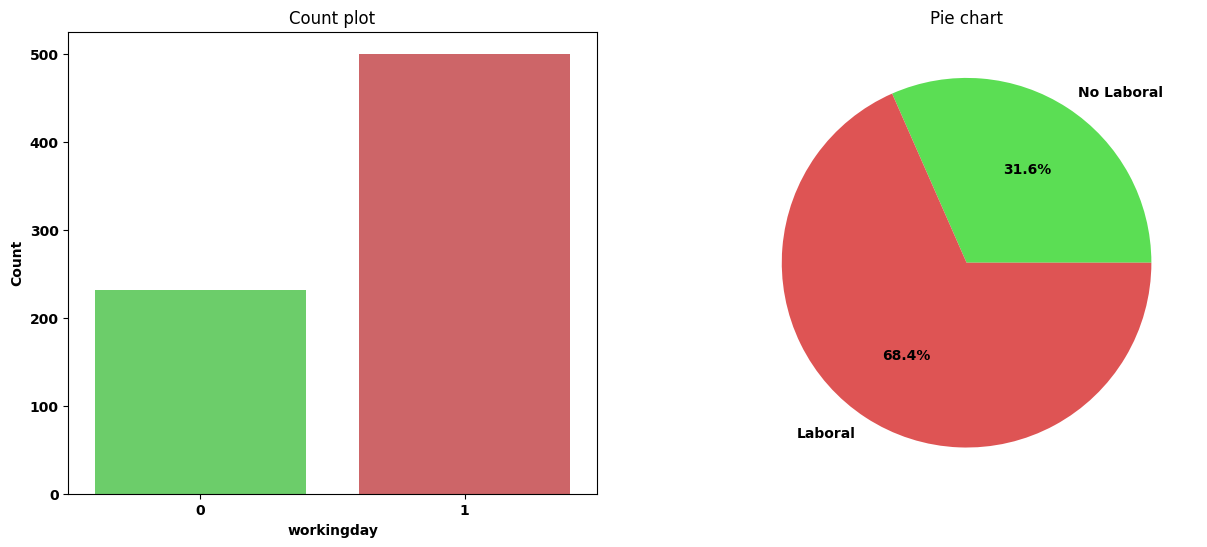

In [7]:
fig, axes = plt.subplots(1,2, figsize=(15, 6))

# Count plot (primera gráfica)
sns.countplot(data=df_bike2, x='workingday', label=df_bike2['workingday'].value_counts().sort_values().index, palette=['#5cde59',"#de5458"], ax=axes[0])
axes[0].set_title("Count plot")
axes[0].set_ylabel("Count")

# pie chart (segunda gráfica)
plt.pie(df_bike2['workingday'].value_counts().sort_values(), autopct='%.1f%%', labels=['No Laboral', 'Laboral'], colors=['#5bde54',"#de5454"])
axes[1].set_title("Pie chart")

plt.show()

La variable más determinante en este análisis sería el **número de los usuarios/viajes** que se han registrado cada día. Realizamos un análisis estadístico para ver la **distribución de volumetría de bicicletas alquiladas** en función de otras variables del dataset.   

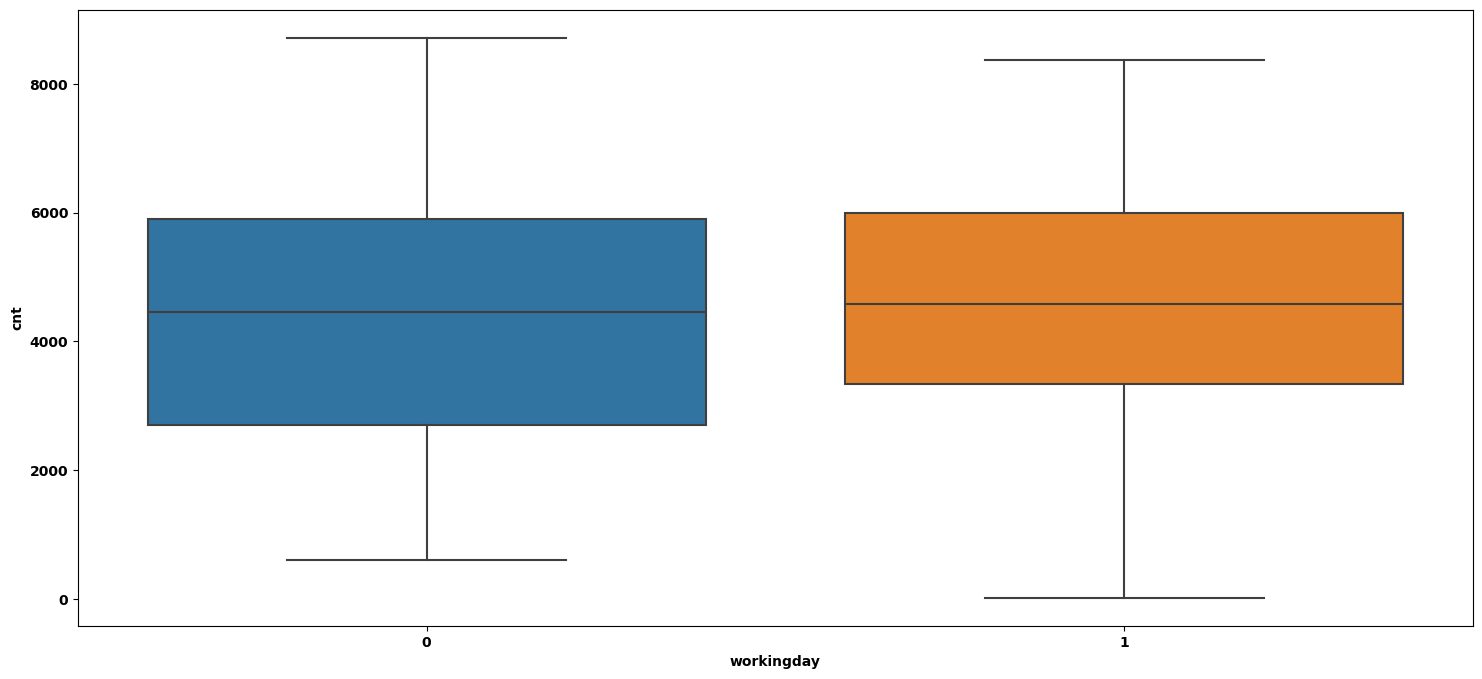

In [8]:
# Análisis de volumetría en función de días laborables
sns.boxplot(data=df_bike2, x='workingday', y='cnt')
plt.show()

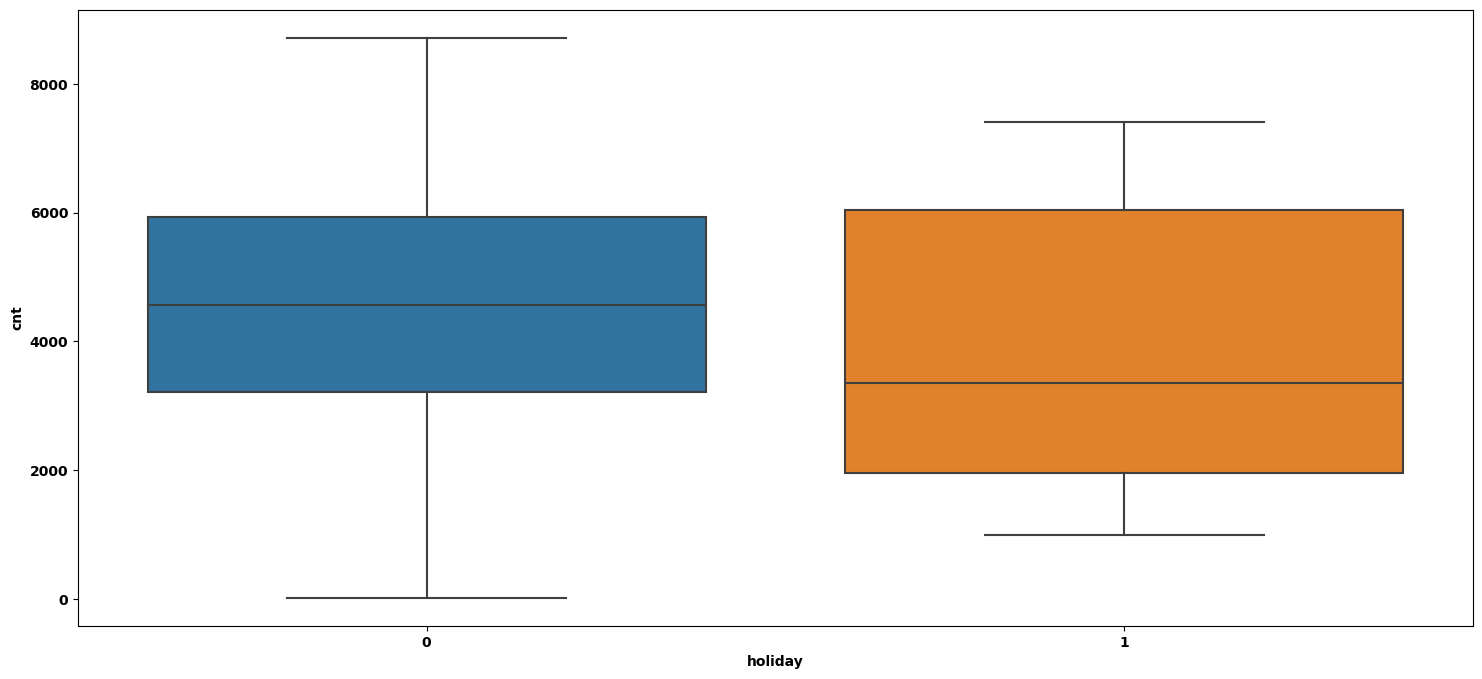

In [9]:
# Análisis de volumetría en función de la festividad
sns.boxplot(data=df_bike2, x='holiday', y='cnt')
plt.show()

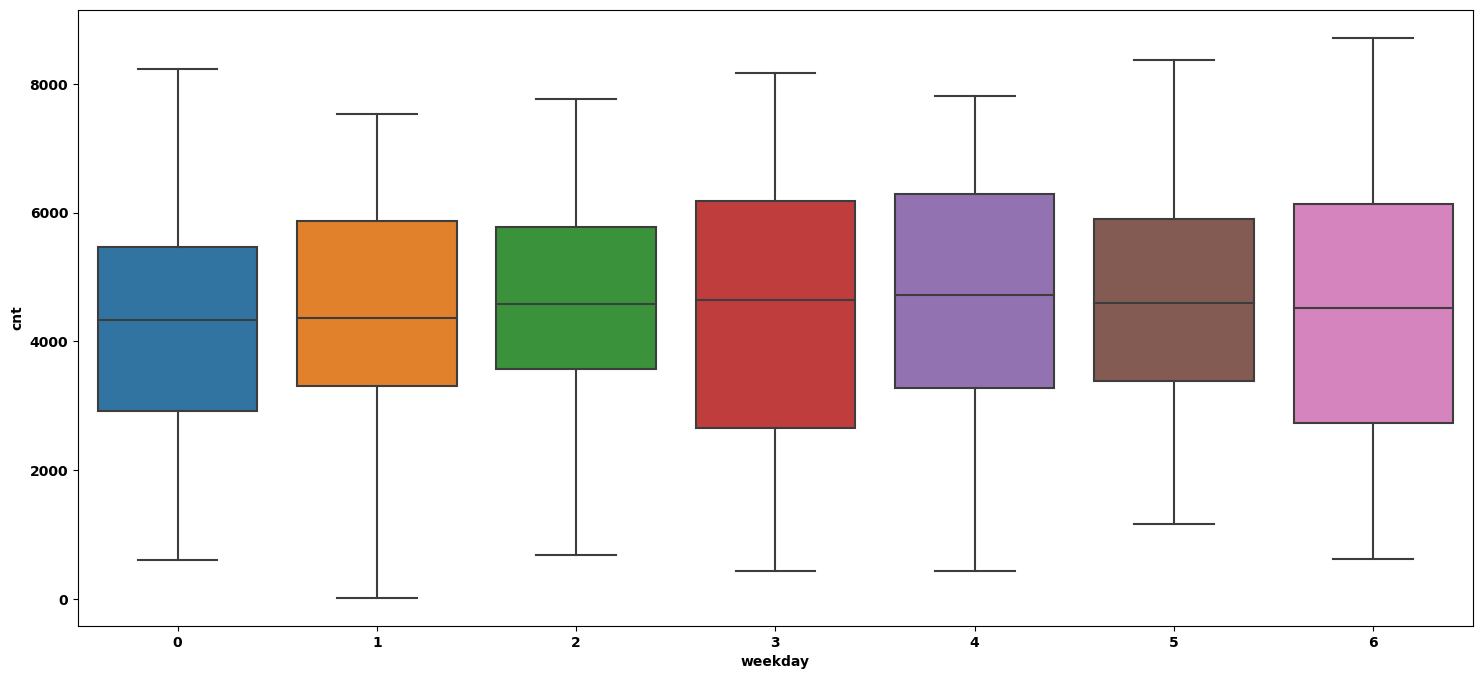

In [10]:
# Análisis de volumetría en función de días la semana
sns.boxplot(data=df_bike2, x='weekday', y='cnt')
plt.show()

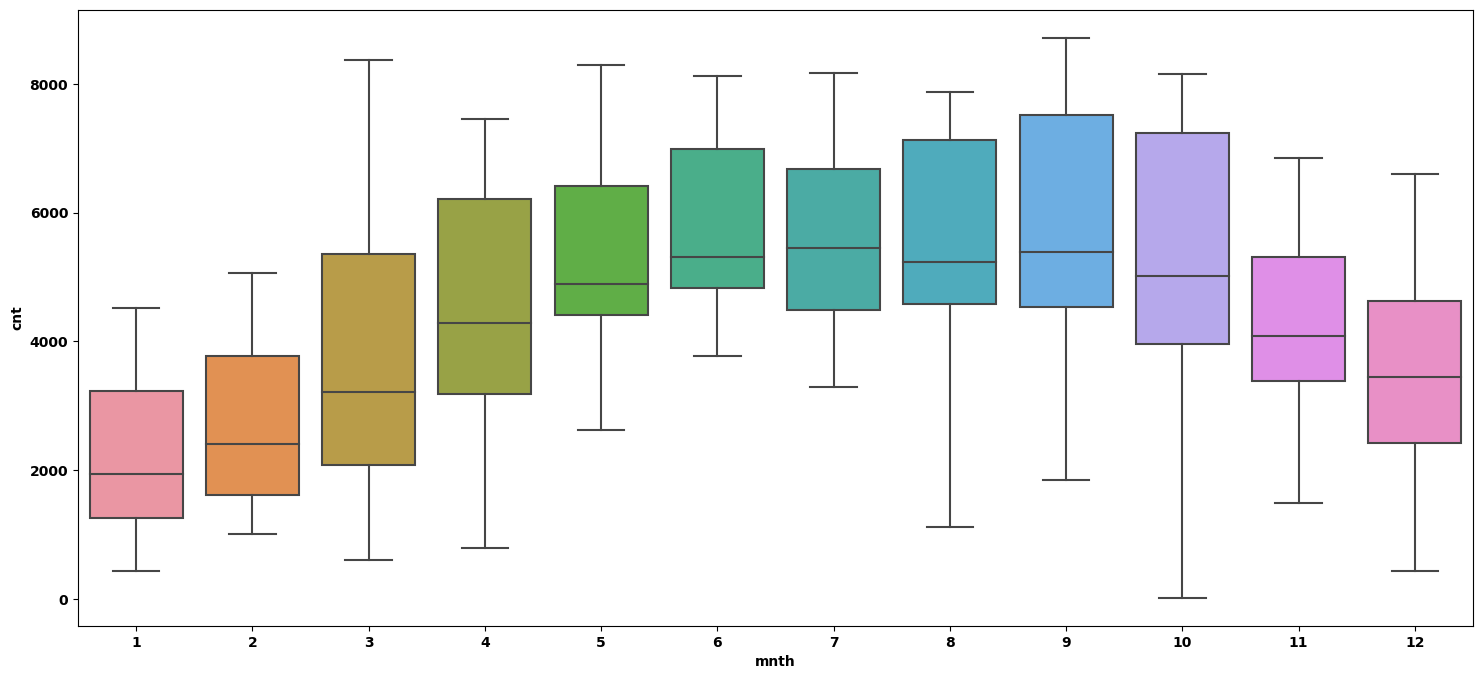

In [11]:
# Análisis de volumetría por mes
sns.boxplot(data=df_bike2, x='mnth', y='cnt')
plt.show()

Este gráfico confirma que nuestro dataset tiene una **estacionalidad considerable**. Este hecho seguramente influiría en la extracción de grupos de viajes y analizar los **patrones de movilidad** correspondiente al servicio de _bike-sharing_. 

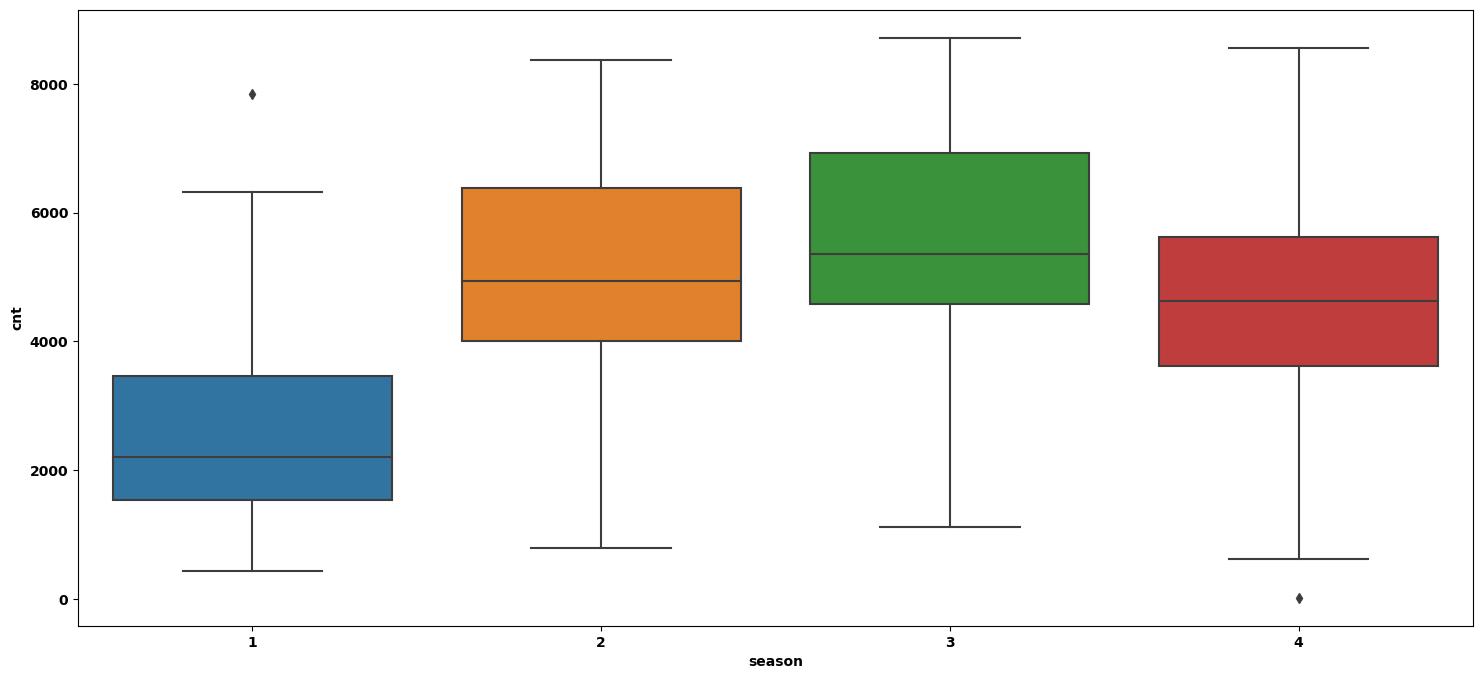

In [12]:
# Análisis de volumetría en función de la estación del año
sns.boxplot(data=df_bike2, x='season', y='cnt')
plt.show()

Es de esperar que la estacionalidad mensual afecte en su forma agregada a la **evolución trimestral** de volumetría de _bike-sharing_ según la **estación del año**.

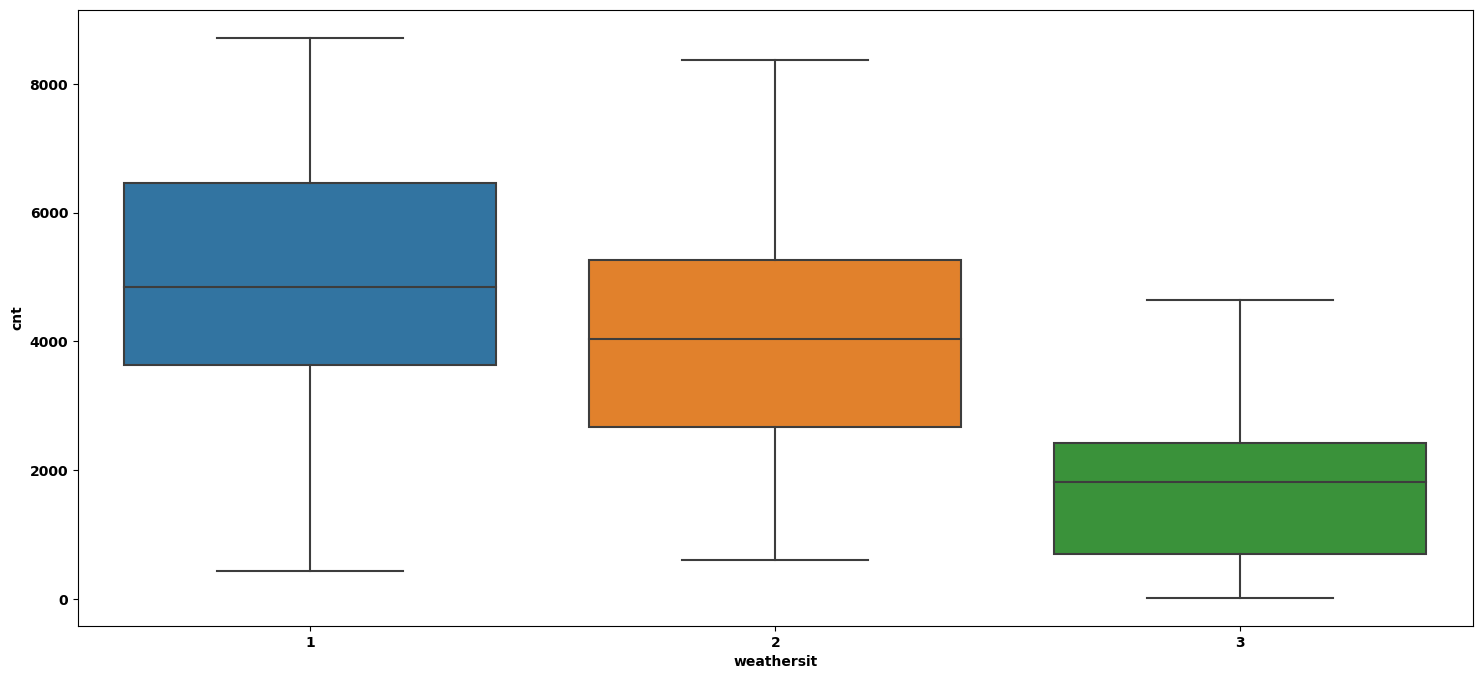

In [13]:
# Análisis de volumetría en función de la situación climática
sns.boxplot(data=df_bike2, x='weathersit', y='cnt')
plt.show()

Se observa una **distinción lógica** entre las volumetrías registradas para cada situación climática, indicando la importancia de las **condiciones meteorológicas** sobre el uso de servicio de _bike-sharing_. 

Examinamos las realciones que hay entre las variables de tiempo para analizar mejor esta correlación.

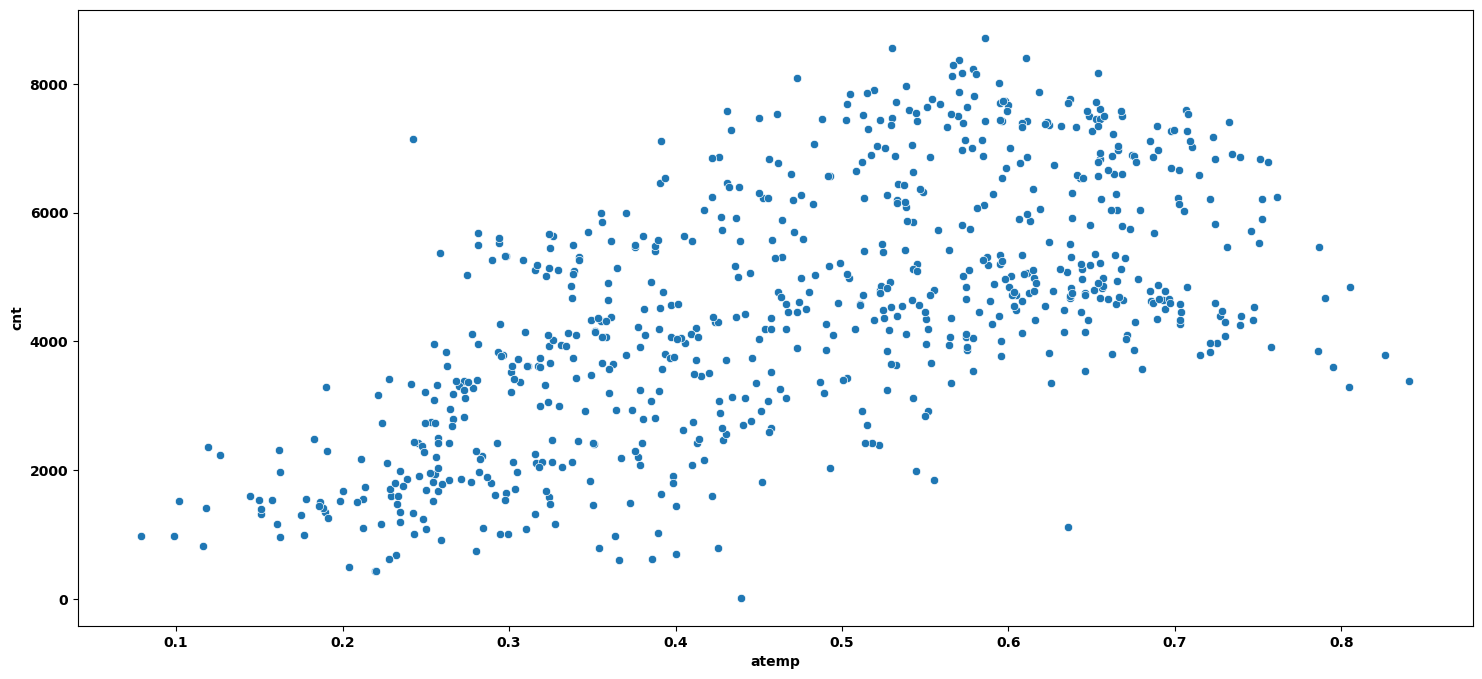

In [14]:
# Dibujar la relación entre la temperatura (la sensación térmica) y la volumetría
sns.scatterplot(data=df_bike2, x='atemp', y='cnt')
plt.show()

Se puede observar que efectivamente los días con **más bicicletas alquiladas** corresponden a los días con **las temperaturas moderadas**. 

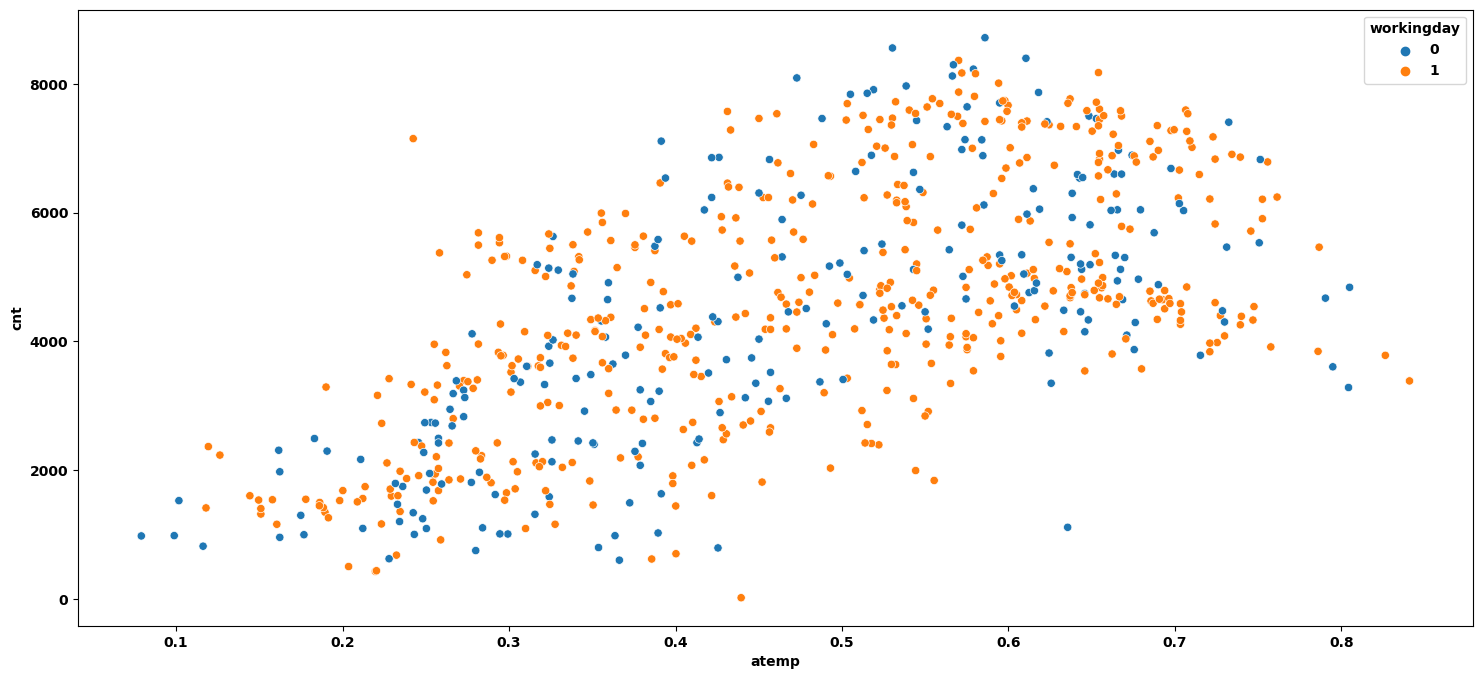

In [15]:
sns.scatterplot(data=df_bike2, x='atemp', y='cnt', hue='workingday')
plt.show()

Si pintamos según los días laborables cada punto en la gráfica antreior entre temperatura y los volúmenes de viajes o bicicletas alquiladas, se ve que **no hay una realción** que distinga la evolución de los datos en función de esta variable.

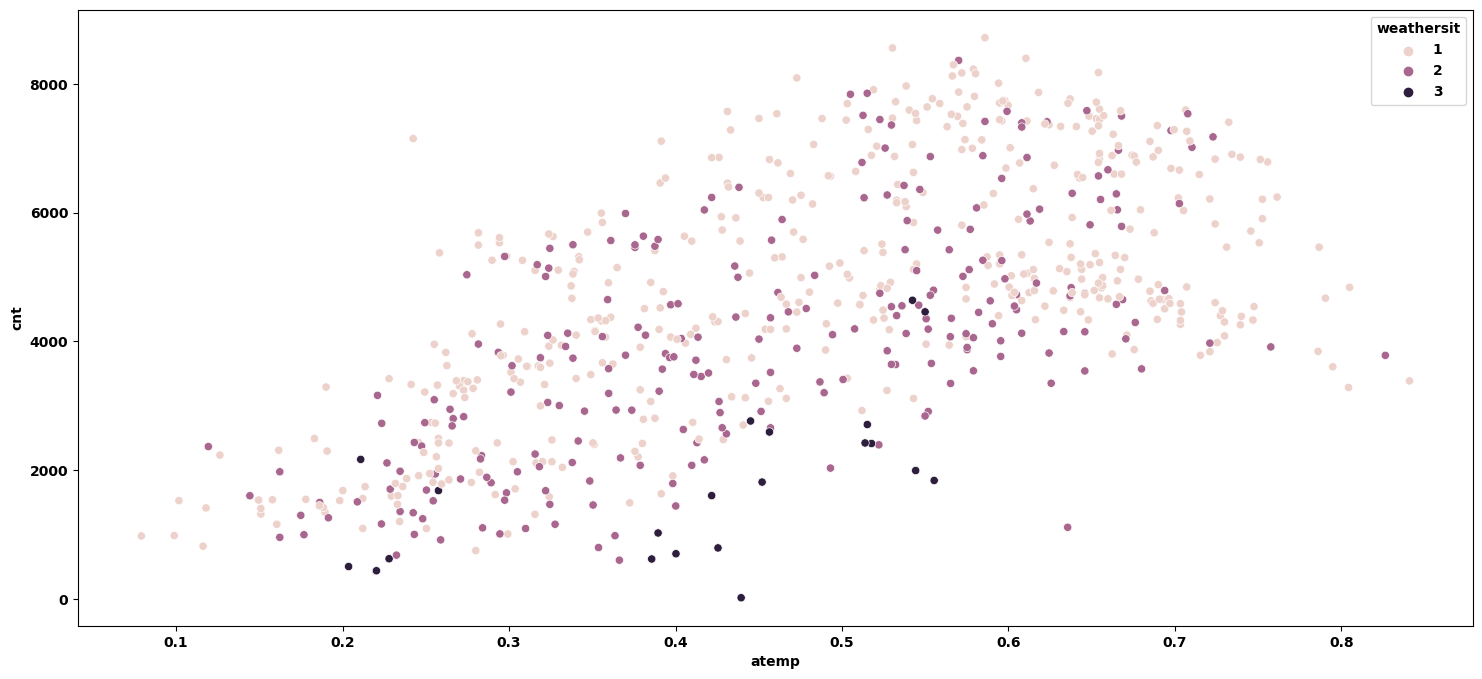

In [16]:
sns.scatterplot(data=df_bike2, x='atemp', y='cnt', hue='weathersit')
plt.show()

Pintando los datos de acuerdo con la calidad de tiempo que hace en la ciudad, muestra que los **días con menos usos** corresponden a **situaciones meteorológicas adversas**. Podemos observar este mismo comporertamiento si visualizamos las **humedades** registradas.

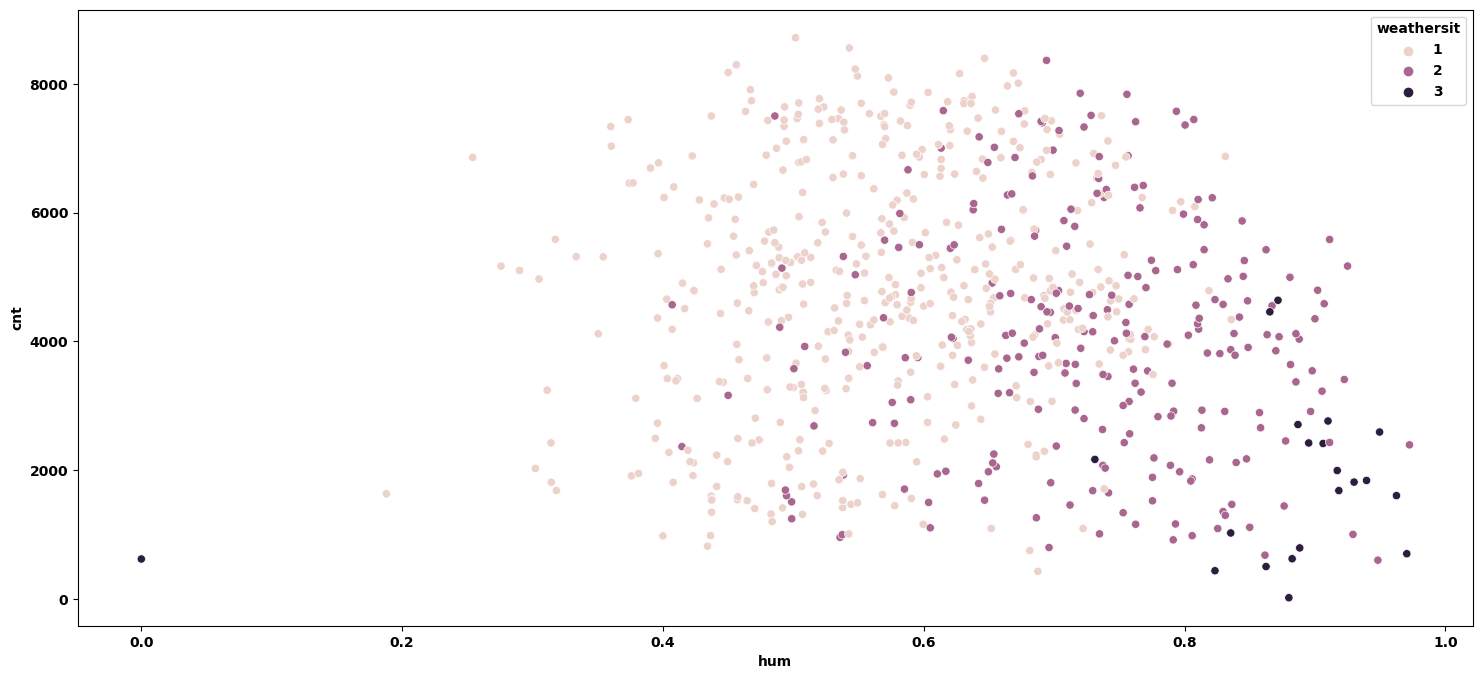

In [17]:
sns.scatterplot(data=df_bike2, x='hum', y='cnt', hue='weathersit')
plt.show()

Viendo las gráficas anteriores que visualizan las diferentes variables meteorológicas presentes en este conjunto de datos, podemos quedarnos con la variable categórica de `weathersit` (_Weather situation_) que al parecer resume y representa la noción de cuando hace **"buen tiempo"** o no.

Revisamos otra vez la ditribución de volumetría de bicicletas alquiladas en función del día de la semana (_weekday_), **por si vemos que no aporta una información discriminatoria** a la hora de agrupar los patrones de uso de _bike-sharing_.

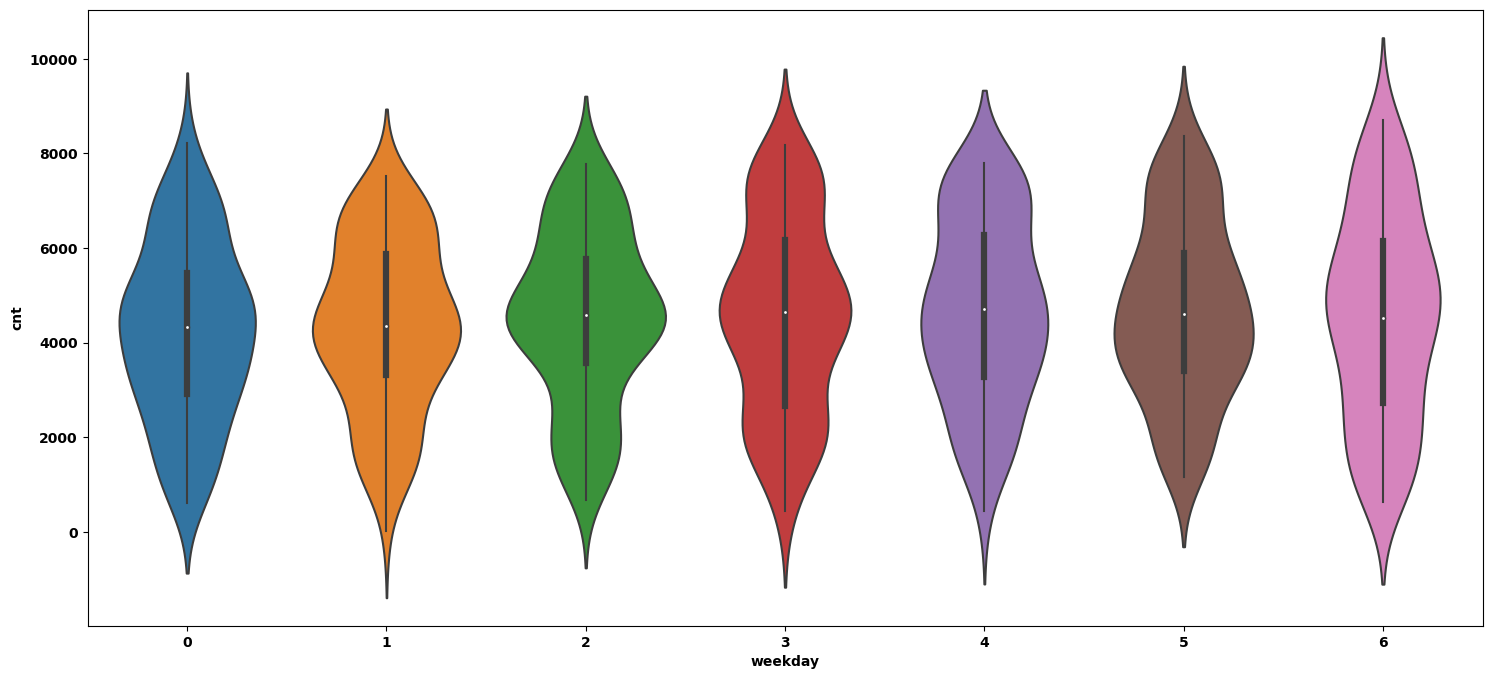

In [18]:
sns.violinplot(data=df_bike2, x='weekday', y='cnt')
plt.show()

Al parecer podemos **prescindir de la variable `weekday`**, porque la **forma y las características** que tiene la distribución de valores para cada día son bastante **similares**.

Por otra parte, pasa algo parecido con la variable `workingday` que no tiene una distribución diferente en sus dos categorías y podemos **ver reflejado el efecto de los días laborales** quizá mejor en la variable **`holiday`**. 

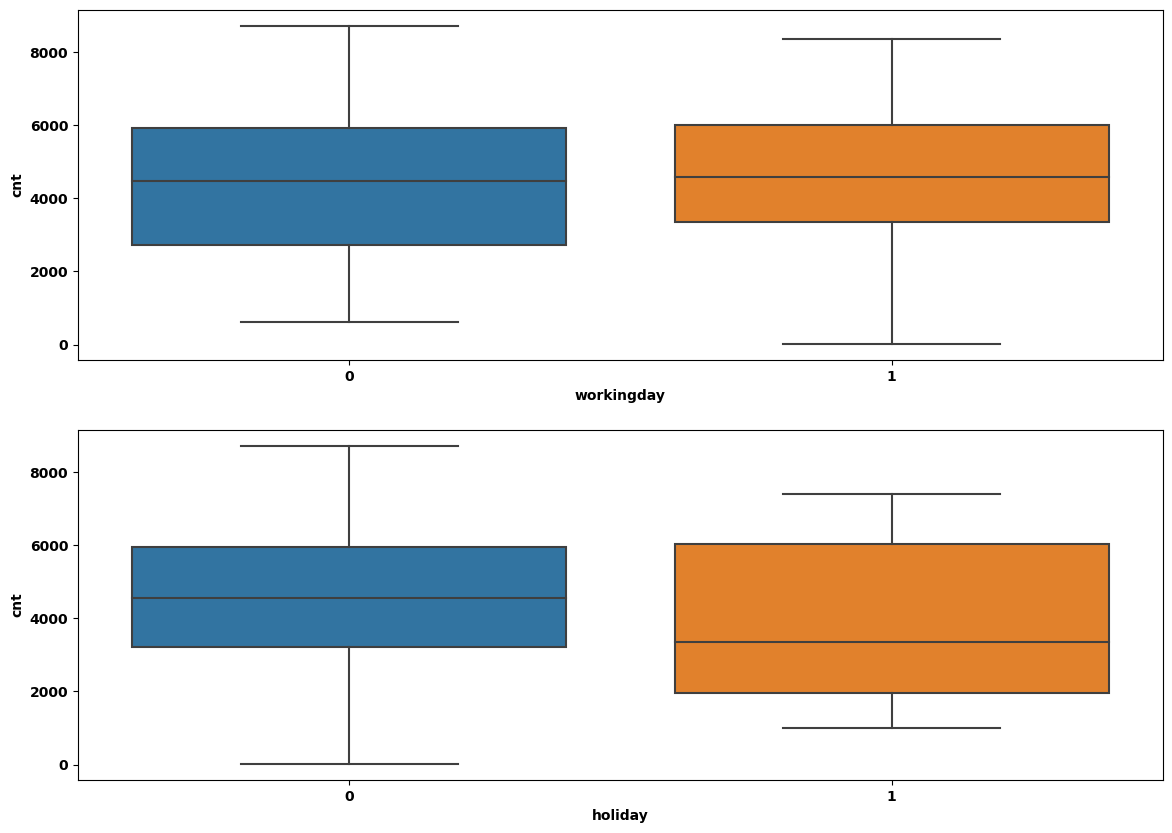

In [19]:
fig , axes = plt.subplots(2, 1, figsize=(14,10))

sns.boxplot(data=df_bike2, x='workingday', y='cnt', ax=axes[0])
sns.boxplot(data=df_bike2, x='holiday', y='cnt', ax=axes[1])
plt.show()

Ahora hacemos otro filtrado para **reducir la dimensionalidad** del conjunto de datos y quedarnos con la parte **representativa** e interesante de los datos.

In [20]:
df_bike3 = df_bike2.drop(columns=['weekday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed'])
df_bike3

,season,mnth,holiday,weathersit,cnt
0,1,1,0,2,985
1,1,1,0,2,801
2,1,1,0,1,1349
3,1,1,0,1,1562
4,1,1,0,1,1600
...,...,...,...,...,...
726,1,12,0,2,2114
727,1,12,0,2,3095
728,1,12,0,2,1341
729,1,12,0,1,1796


Analizamos en su conjunto las **relaciones exsitentes** entre las variables del dataset filtrado, considerando la importancia de las **condiciones meteorológicas**.

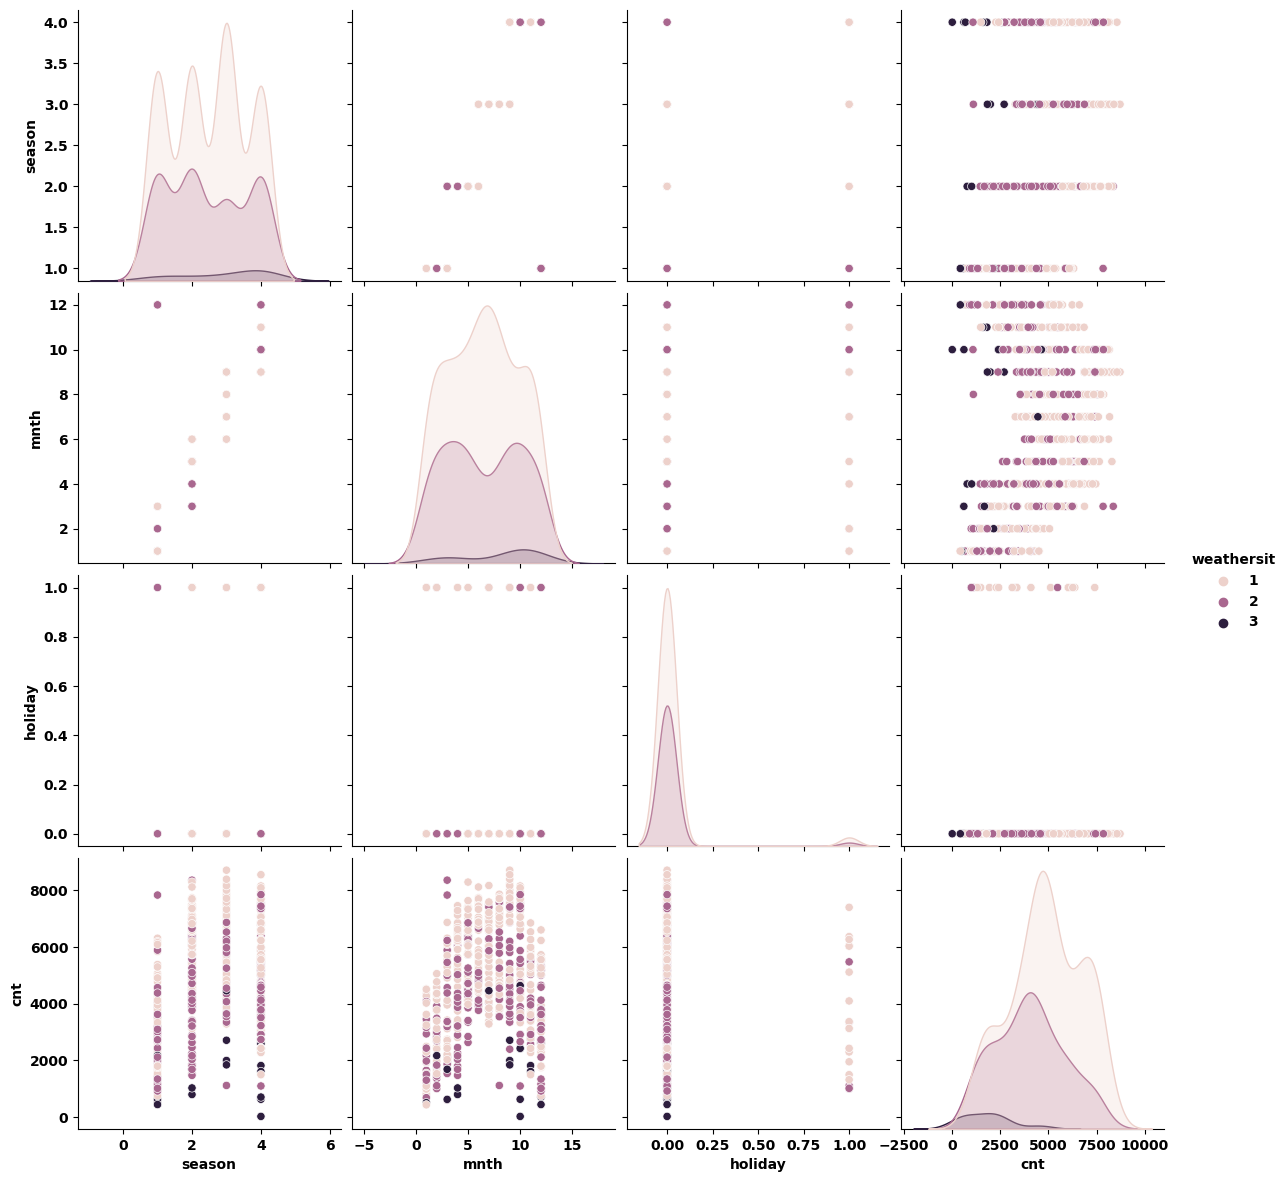

In [21]:
sns.pairplot(df_bike3, hue='weathersit', height=3)
plt.show()

Esta vista sobre el conjunto de las variables **confirma el efecto discriminador de la variable `weathersit`**, ya que extrae **distribuciones desemejantes** en función de sus valores para cada variable. Hacemos zoom por ejemplo para visualizar mejor este efecto en la relación entre la volumetría de las bicicletas alquiladas diariamente y los meses del año considerando la situación del tiempo. 

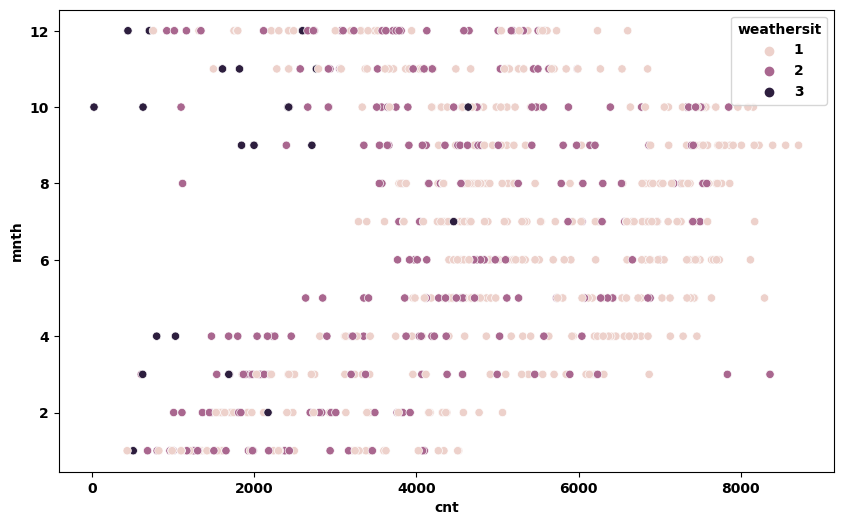

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_bike3, x='cnt', y='mnth', hue='weathersit')
plt.show()

---

### **`Ejercicio 23.1`**

Para poder realizar un ejercicio de **aprendizaje no-supervisado** tipo **clustering**, necesitamos hacernos primero una idea sobre el **número de los clusters o grupos** que están presentes en los datos. 

**`23.1.1`** En primer lugar **estandariza** los datos del dataset filtrado (_df_bike3_) llevando los valores de cada variable a una escala **entre 0 y 1**.

**`23.1.2`** Utiliza las distintas técnicas de análisis de calidad de clustering y **estima según cada métrica** el número de los grupos de datos presentes en este data set:

 - WSS (Elbow method)
 - Silhouette score
 - Davies-Bouldin index
 - Calinski and Harabasz score
 - BIC score (implementación adhoc de la sesión 22)
 - BIC score of GMM
 - `random_state=100`

### **`Ejercicio 23.2`**

**`23.2.1`** Aplica un análisis de componentes principales usando el método **`PCA`** de la librería _sklearn_ para llevar los datos a un **espacio bidimensional**. Calcula **el porcentaje total de varianza** que incluyen los dos componentes principales juntos, después:

- Visualiza en una gráfica los datos del vector con los valores proyeccionados a los dos componentes principales.
- Visualiza la misma gráfica, ésta vez pintando los puntos de datos según la condición meteorológica del día (variable `weathersit`).

**`23.2.2`** Utiliza la visualización obtenida de los datos en el espacio bidimensional para hacer una **estimación del número óptimo de los clusters** o grupos presentes en el dataset. Y comprueba si coincide por ejemplo con el número estimado mediante la última técnica que aplicaste en el punto anterior (_23.1.2_) 

**`23.2.3`** Vuelve a calcular las diferentes métricas de análisis de calidad de clustering, ésta vez usando el **vector con los datos proyeccionados** a los dos componentes principales, y compara si cada estimación coincide con el número óptimo de clusters inferido en el paso anterior:

 - WSS (Elbow method)
 - Silhouette score
 - Davies-Bouldin index
 - Calinski and Harabasz score
 - BIC score (implementación adhoc de la sesión 22)
 - BIC score of GMM
 - `random_state=100`

### **`Ejercicio 23.3`**

**`23.3.1`** Crea diferentes modelos de clustering **usando el vector con los datos proyeccionados a los dos componentes principales**, genera las gráficas de cada modelo dibujando los centroides si se corresponde y compara los resultados obtenidos según estas gráficas. Explica cuál de estos método logra **acercarse más a la agrupación sugerida** mediante la visualización de los datos transformados al espacio bidimensional (_23.2.2_) :  

 - `random_state=100` 
 - K-Means
 - K-Medoids
 - GMM
 - DBSCAN (`eps=0.10`)
 - Agglomerative con dendograma (`method ='single', metric='euclidean'`)

**`23.3.2`** Añade los resultados del último modelo (_AgglomerativeClustering_) a los datos del DataFrame filtrado (_df_bike3_) para guardar en una nueva columna llamada `'labels'` las etiquetas generadas por el modelo de clustering jerárquico. Después, crea las siguientes gráficas para analizar estos resultados:

- _Count plot_ de los`'labels'` que muestra el tamaño de cada cluster.
- La distribución de la volumetría de viajes/bicicletas alquiladas al día (`'cnt'`) para cada cluster (por `'labels'` y usando _boxplot_).
- La distribución del mes de año (`'mnth'`) para cada cluster (por `'labels'` y usando _boxplot_).
- La distribución de la calidad del tiempo que hace en la ciudad (`'weathersit'`) para cada cluster (por `'labels'` y usando _boxplot_).
- La distribución de la estación del año (`'season'`) para cada cluster (por `'labels'` y usando _boxplot_).


### **`Ejercicio 23.4`**

**`23.4.1`** Compara las cracterísticas del **primer cluster** con el **décimo grupo** (_cluster_0_ y _cluster_9_) y explica los aspectos que revelan acada uno de estos grupos sobre los **distintos patrones de movilidad y el uso de _bike-sharing_** en la ciudad. Te puedes basar en los siguientes criterios para describir y comparar el perfil que representa cada cluster:

- El volúmen de los viajes diarios o el uso registrado de _bike-sharing_ por día.
- El mes de año.
- Las condiciones del tiempo.

Y al final sugiere algunos usos que se pueda sacar de estos resultados!! 

---

In [23]:
#ejercicio 23.1.1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_bike3_scaled = pd.DataFrame(scaler.fit_transform(df_bike3), columns=df_bike3.columns)
df_bike3_scaled

,season,mnth,holiday,weathersit,cnt
0,0.0,0.0,0.0,0.5,0.110792
1,0.0,0.0,0.0,0.5,0.089623
2,0.0,0.0,0.0,0.0,0.152669
3,0.0,0.0,0.0,0.0,0.177174
4,0.0,0.0,0.0,0.0,0.181546
...,...,...,...,...,...
726,0.0,1.0,0.0,0.5,0.240681
727,0.0,1.0,0.0,0.5,0.353543
728,0.0,1.0,0.0,0.5,0.151749
729,0.0,1.0,0.0,0.0,0.204096


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\f

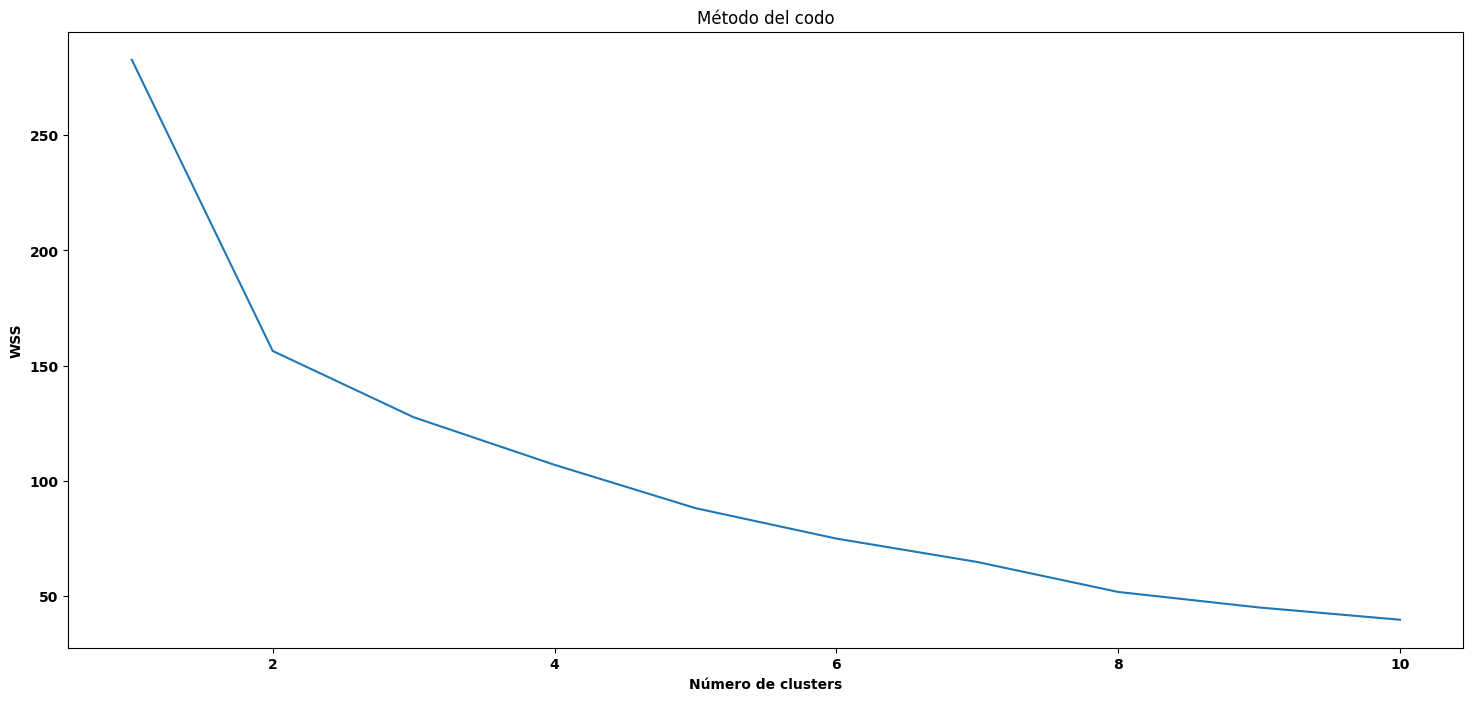

In [24]:
#ejericicio 23.1.2
#elbow method
from sklearn.cluster import KMeans
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(df_bike3_scaled)
    wss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wss)
plt.title('Método del codo')
plt.xlabel('Número de clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\f

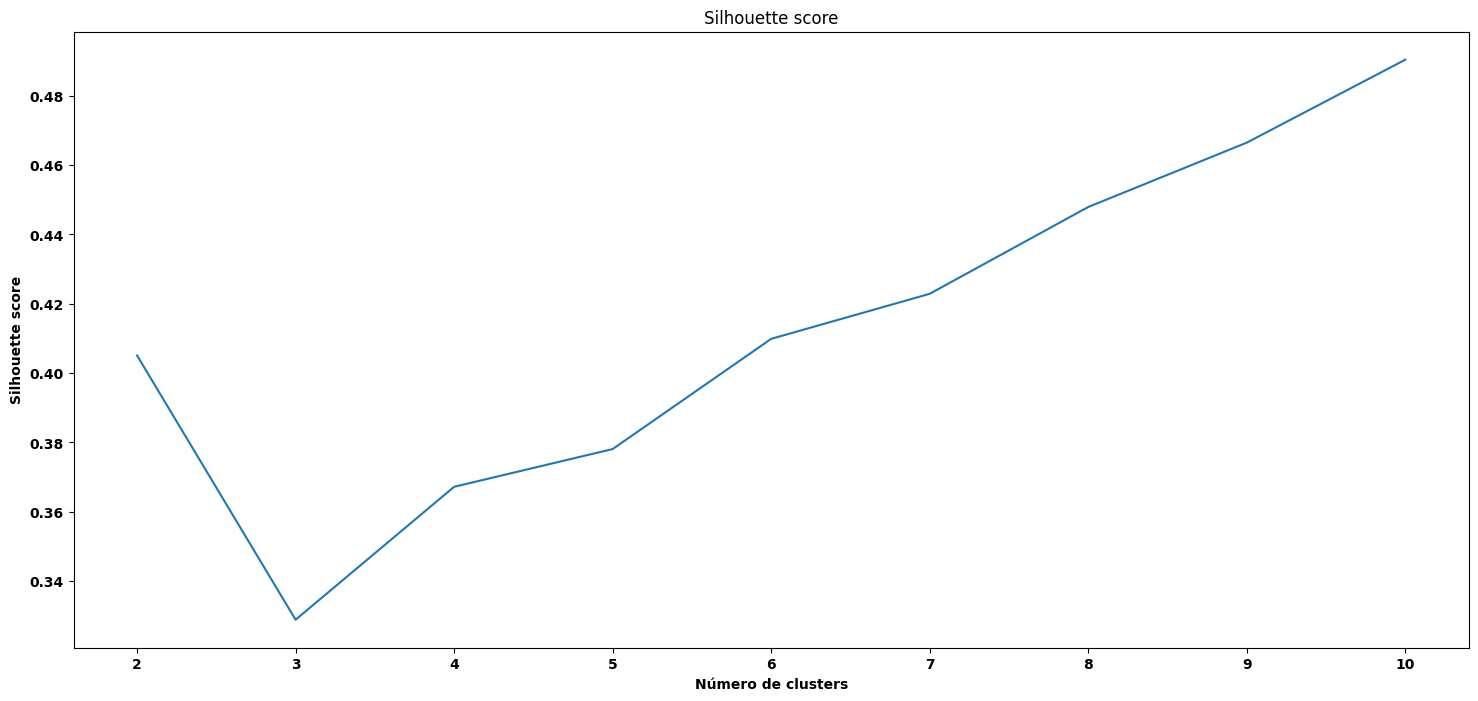

In [25]:
#Silhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    labels = kmeans.fit_predict(df_bike3_scaled)
    score = silhouette_score(df_bike3_scaled, labels)
    silhouette_scores.append(score)

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette score')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette score')
plt.show()

C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\f

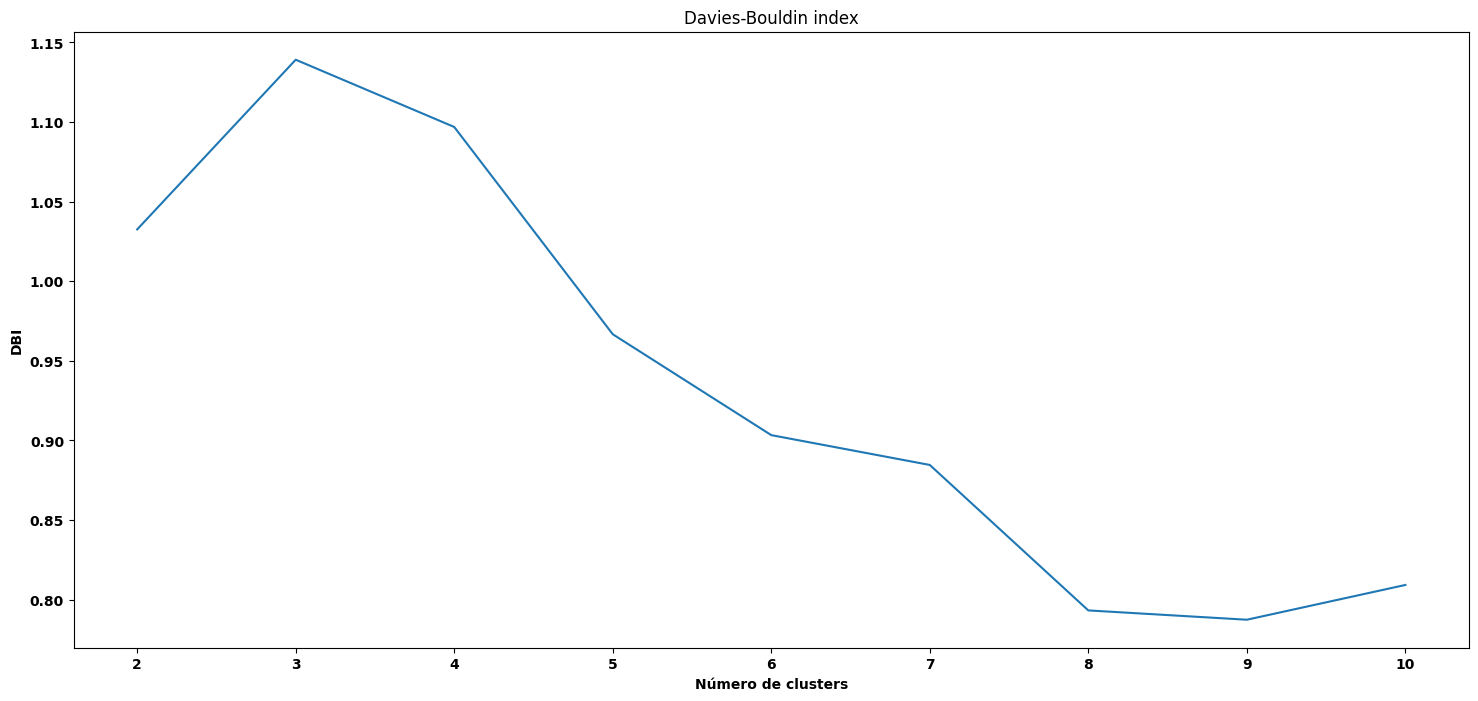

In [26]:
#Davies-Bouldin index
from sklearn.metrics import davies_bouldin_score

db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    labels = kmeans.fit_predict(df_bike3_scaled)
    score = davies_bouldin_score(df_bike3_scaled, labels)
    db_scores.append(score)

plt.plot(range(2, 11), db_scores)
plt.title('Davies-Bouldin index')
plt.xlabel('Número de clusters')
plt.ylabel('DBI')
plt.show()

C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\f

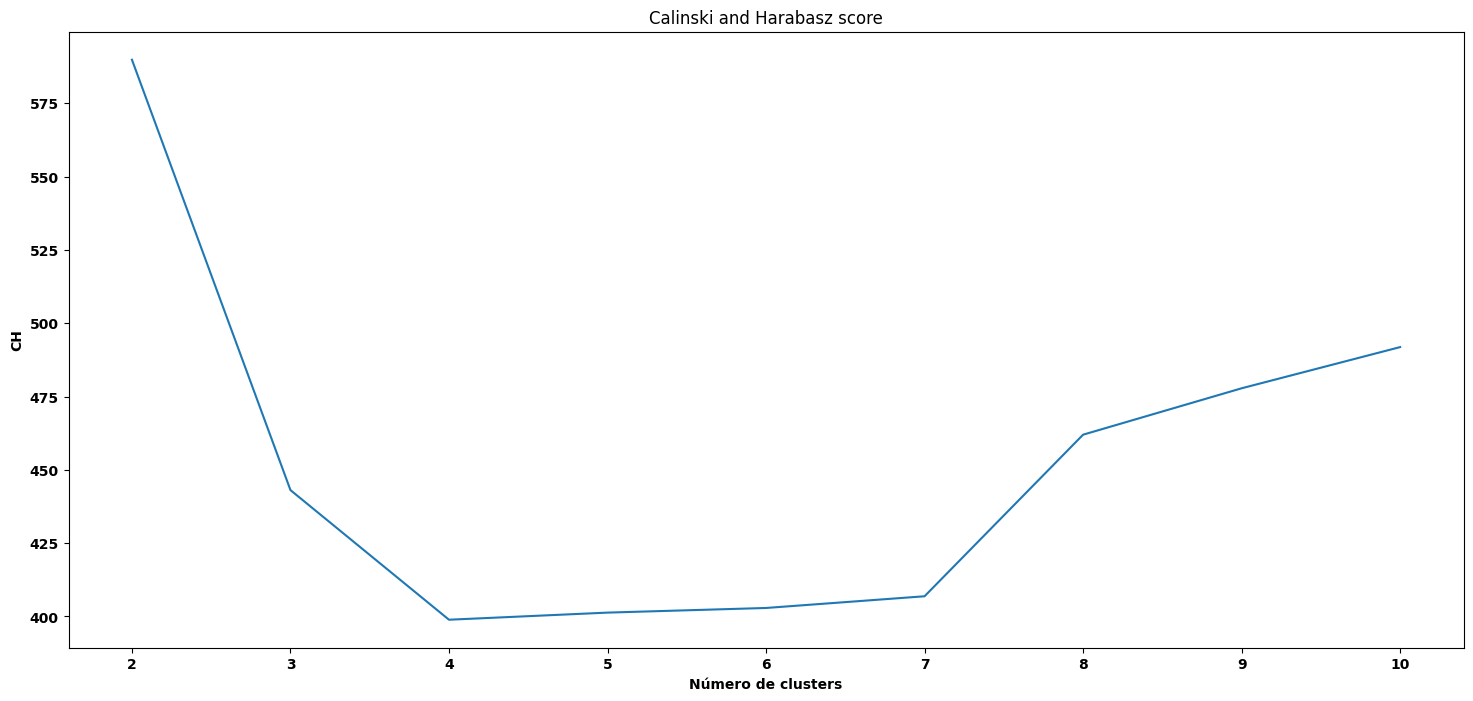

In [27]:
#Calinski and Harabasz score

from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    labels = kmeans.fit_predict(df_bike3_scaled)
    score = calinski_harabasz_score(df_bike3_scaled, labels)
    ch_scores.append(score)

plt.plot(range(2, 11), ch_scores)
plt.title('Calinski and Harabasz score')
plt.xlabel('Número de clusters')
plt.ylabel('CH')
plt.show()

C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\f

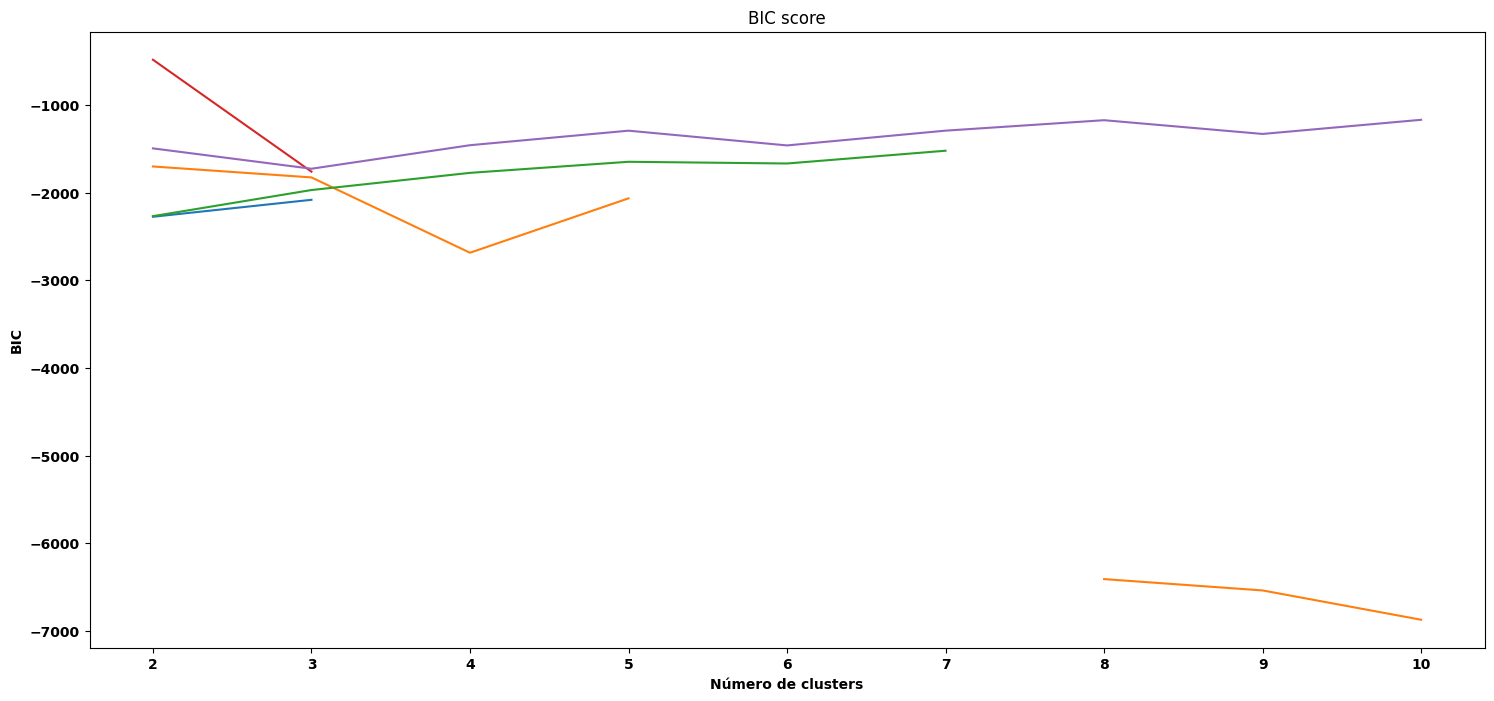

In [28]:
#BIC score (implementación adhoc de la sesión 22)
import math
def bic_score(X, labels):
  """
  BIC score for the penalization of complexity-vs-goodness of fit of clusters.
  """
    
  n_points = len(labels)
  n_clusters = len(set(labels))
  n_dimensions = X.shape[1]

  n_parameters = (n_clusters - 1) + (n_dimensions * n_clusters) + 1

  loglikelihood = 0
  for label_name in set(labels):
    X_cluster = X[labels == label_name]
    n_points_cluster = len(X_cluster)
    centroid = np.mean(X_cluster, axis=0)
    variance = np.sum((X_cluster - centroid) ** 2) / (len(X_cluster) - 1)
    loglikelihood += \
      n_points_cluster * np.log(n_points_cluster) \
      - n_points_cluster * np.log(n_points) \
      - n_points_cluster * n_dimensions / 2 * np.log(2 * math.pi * variance) \
      - (n_points_cluster - 1) / 2
    
  bic = loglikelihood - (n_parameters / 2) * np.log(n_points)
        
  return -bic




bic_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(df_bike3_scaled)
    score = bic_score(df_bike3_scaled, kmeans.labels_)
    bic_scores.append(score)

plt.plot(range(2, 11), bic_scores)
plt.title('BIC score')
plt.xlabel('Número de clusters')
plt.ylabel('BIC')
plt.show()

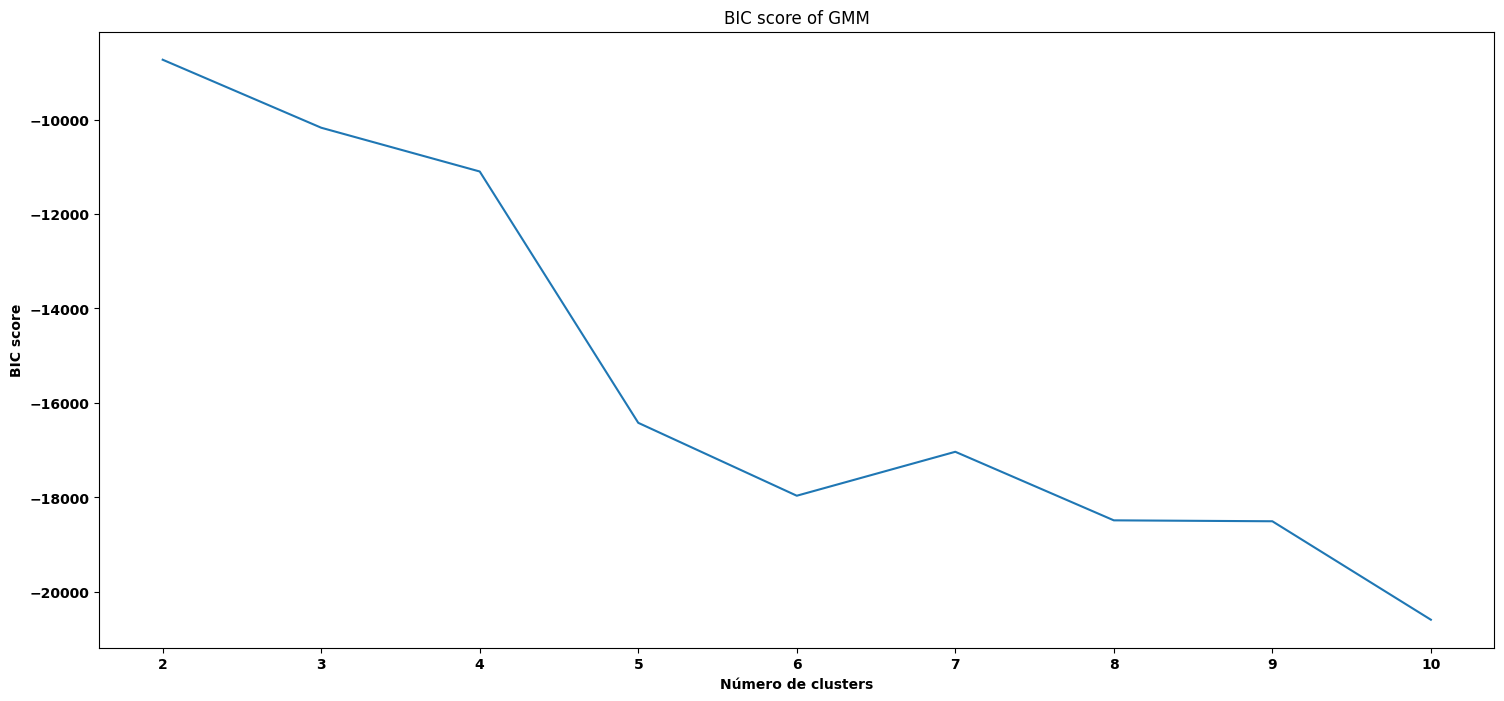

In [29]:
#BIC score of GMM


from sklearn.mixture import GaussianMixture
from sklearn import preprocessing

bic_scores = []
for k in range(2, 11):
    gmm = GaussianMixture(n_components=k, random_state=100)
    gmm.fit(df_bike3_scaled)
    bic = gmm.bic(df_bike3_scaled)
    bic_scores.append(bic)

plt.plot(range(2, 11), bic_scores)
plt.title('BIC score of GMM')
plt.xlabel('Número de clusters')
plt.ylabel('BIC score')
plt.show()

In [30]:
#ejercicio 23.2.1

df_bike3_scaled

from sklearn.decomposition import PCA

# Aplicar PCA con dos componentes
pca = PCA(n_components=2)
pca.fit(df_bike3_scaled)
df_bike3_pca = pca.transform(df_bike3_scaled)

# Calcular la varianza explicada
var_exp = pca.explained_variance_ratio_.sum()
print(f"La varianza explicada por los dos componentes principales es del {var_exp*100:.2f}%")


La varianza explicada por los dos componentes principales es del 79.36%


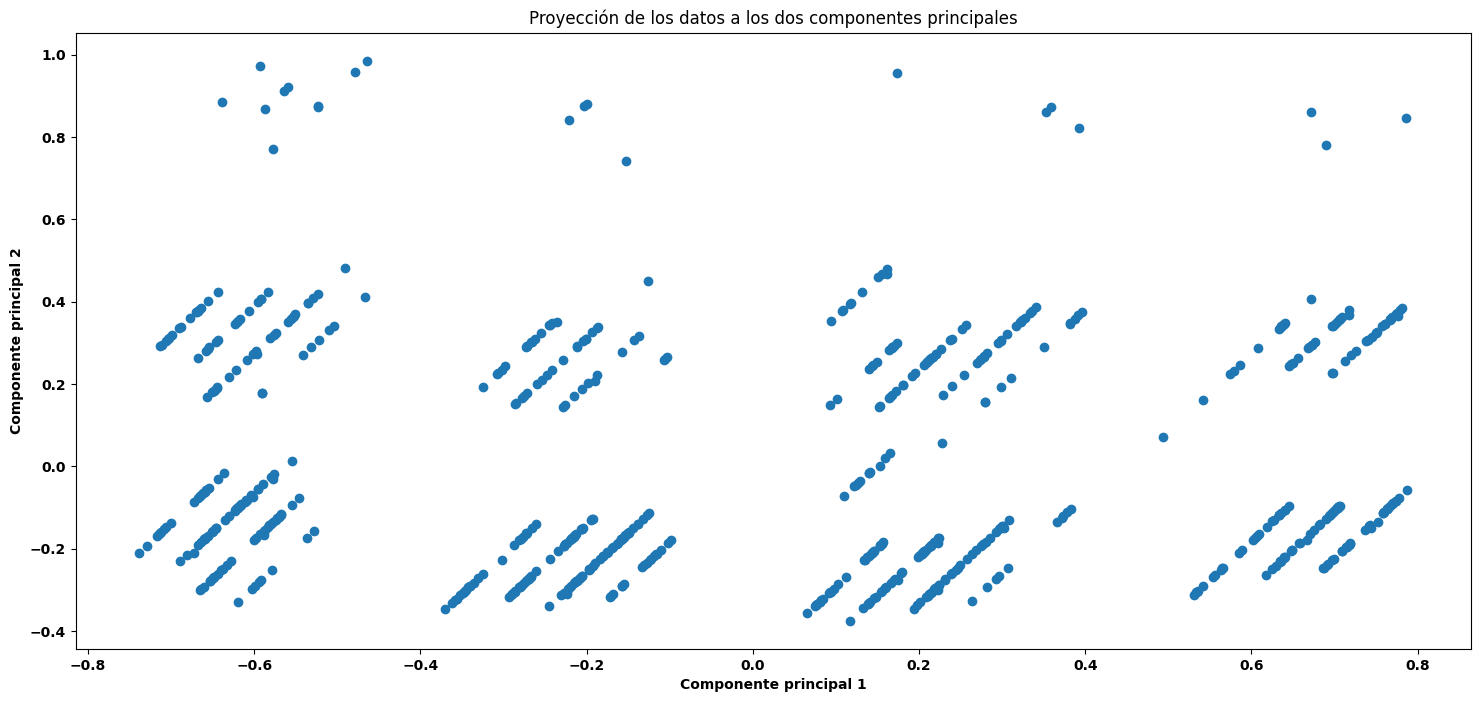

In [31]:
import matplotlib.pyplot as plt
#Visualiza en una gráfica los datos del vector con los valores proyeccionados a los dos componentes principales.
plt.scatter(df_bike3_pca[:,0], df_bike3_pca[:,1])
plt.title('Proyección de los datos a los dos componentes principales')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

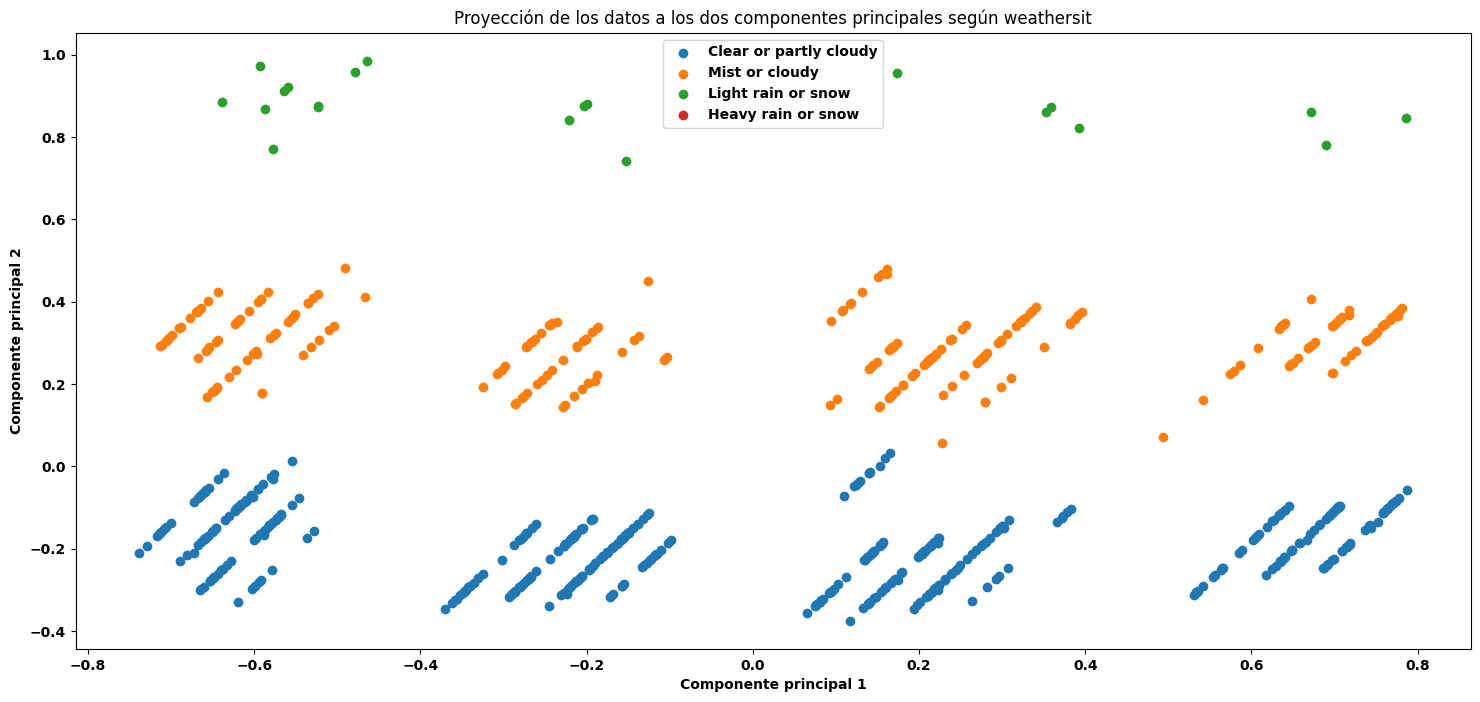

In [32]:
# Visualiza la misma gráfica, ésta vez pintando los puntos de datos según la condición meteorológica del día (variable `weathersit`).
plt.scatter(df_bike3_pca[df_bike3['weathersit']==1,0], df_bike3_pca[df_bike3['weathersit']==1,1], label='Clear or partly cloudy')
plt.scatter(df_bike3_pca[df_bike3['weathersit']==2,0], df_bike3_pca[df_bike3['weathersit']==2,1], label='Mist or cloudy')
plt.scatter(df_bike3_pca[df_bike3['weathersit']==3,0], df_bike3_pca[df_bike3['weathersit']==3,1], label='Light rain or snow')
plt.scatter(df_bike3_pca[df_bike3['weathersit']==4,0], df_bike3_pca[df_bike3['weathersit']==4,1], label='Heavy rain or snow')
plt.title('Proyección de los datos a los dos componentes principales según weathersit')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.legend()
plt.show()


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\f

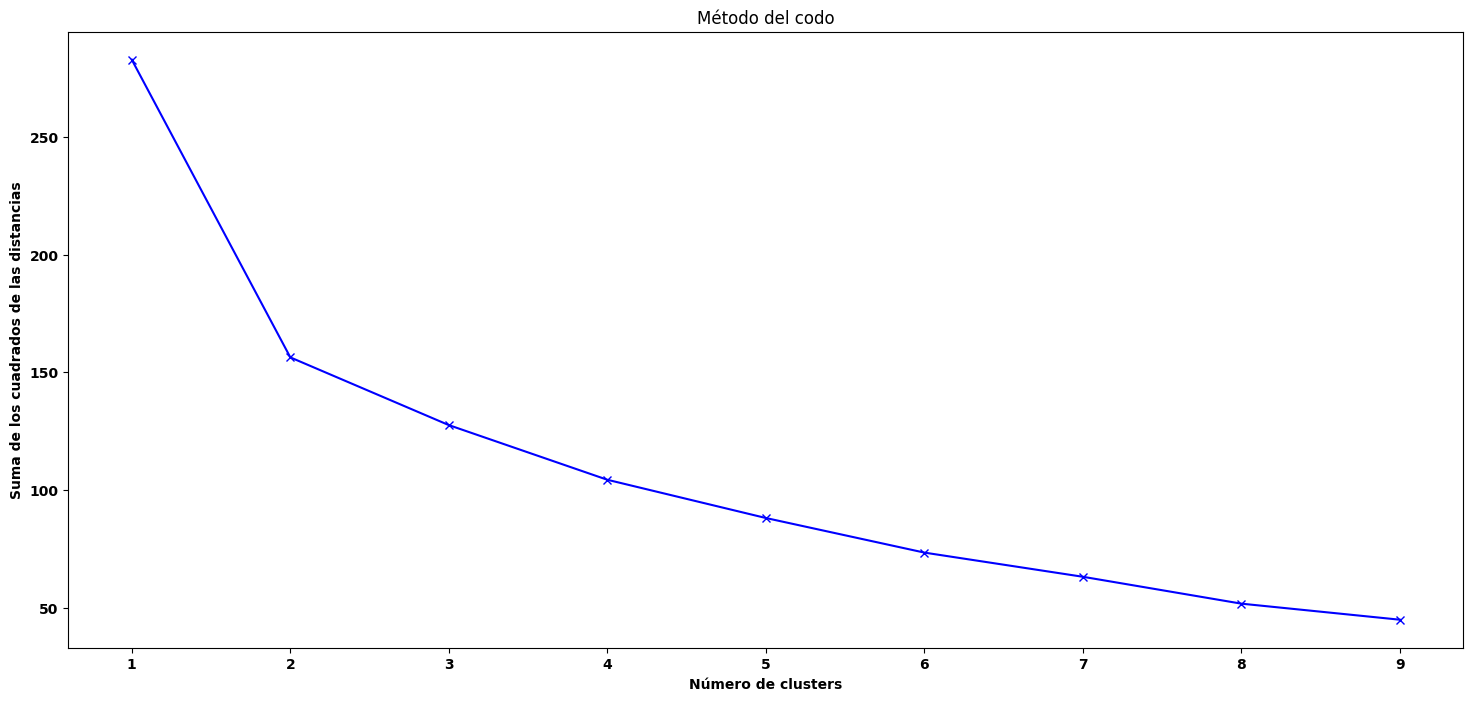

In [34]:
#ejercicio 23.2.2

# Definimos una lista para almacenar los valores de la suma de los cuadrados de las distancias
# en función del número de clusters
sum_of_squared_distances = []

# Definimos una lista con el rango de valores del número de clusters que queremos probar
K = range(1, 10)

# Para cada valor de k, calculamos la suma de los cuadrados de las distancias
# y la almacenamos en la lista sum_of_squared_distances
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(df_bike3_scaled)
    sum_of_squared_distances.append(km.inertia_)

# Visualizamos la suma de los cuadrados de las distancias en función del número de clusters
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Suma de los cuadrados de las distancias')
plt.title('Método del codo')
plt.show()

In [35]:
#ejercicio 23.2.3

from sklearn.decomposition import PCA

# Crear objeto PCA
pca = PCA(n_components=2)

# Ajustar el modelo PCA y transformar los datos
X_pca = pca.fit_transform(df_bike3)

In [36]:
#ejercicio 23.2.3
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np

# Lista de valores de k
k_values = range(2, 11)

# Listas para almacenar las métricas
wss_values = []
silhouette_values = []
db_values = []
ch_values = []
bic_values = []
bic_gmm_values = []

# Calcular las métricas para cada valor de k
for k in k_values:
    # Aplicar el algoritmo KMeans
    kmeans = KMeans(n_clusters=k, random_state=100).fit(X_pca)
    labels = kmeans.labels_
    
    # Calcular la suma de los cuadrados de las distancias intra-cluster
    wss = kmeans.inertia_
    wss_values.append(wss)
    
    # Calcular el valor de silhouette
    silhouette = silhouette_score(X_pca, labels)
    silhouette_values.append(silhouette)
    
    # Calcular el índice de Davies-Bouldin
    db = davies_bouldin_score(X_pca, labels)
    db_values.append(db)
    
    # Calcular el índice de Calinski-Harabasz
    ch = calinski_harabasz_score(X_pca, labels)
    ch_values.append(ch)
    
    # Calcular el BIC
    bic = bic_score(kmeans, X_pca)
    bic_values.append(bic)
    
    # Calcular el BIC de GMM
    bic_gmm = bic(X_pca, k)
    bic_gmm_values.append(bic_gmm)


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TypeError: unhashable type: 'numpy.ndarray'

C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


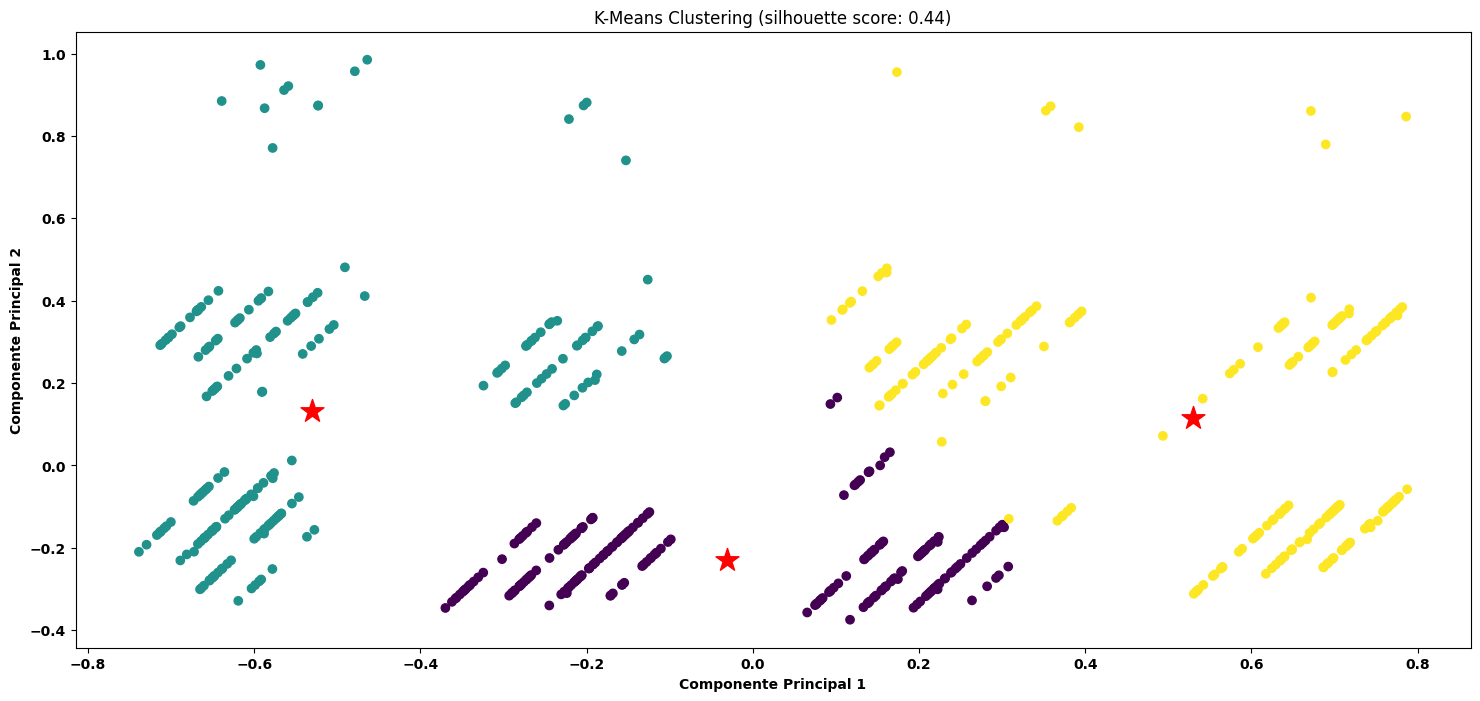

In [37]:
#ejercicio 23.3

# Crear modelo de K-Means
kmeans_model = KMeans(n_clusters=3, random_state=100)

# Entrenar el modelo con los datos proyectados
kmeans_model.fit(df_bike3_pca)

# Obtener las etiquetas de cada punto
labels = kmeans_model.predict(df_bike3_pca)

# Obtener las coordenadas de los centroides
centroids = kmeans_model.cluster_centers_

# Calcular el score de silueta para evaluar el modelo
silhouette_avg = silhouette_score(df_bike3_pca, labels)

# Visualizar los datos y los centroides
plt.scatter(df_bike3_pca[:, 0], df_bike3_pca[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.title(f'K-Means Clustering (silhouette score: {silhouette_avg:.2f})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


In [52]:
# Crear modelo de K-Medoids
import kmedoids

kmedoids_model = kmedoids(n_clusters=3, random_state=100)

# Entrenar el modelo con los datos proyectados
kmedoids_model.fit(df_bike3)

# Obtener las etiquetas de cada punto
labels = kmedoids_model.predict(df_bike3)

# Obtener las coordenadas de los centroides

centroids = kmedoids_model.cluster_centers_
# Calcular el score de silueta para evaluar el modelo
silhouette_avg = silhouette_score(df_bike3, labels)

# Visualizar los datos y los centroides
plt.scatter(df_bike3[:, 0], df_bike3[:, 1], c=labels)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300, c='r')
plt.title(f'K-Medoids Clustering (silhouette score: {silhouette_avg:.2f})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

TypeError: 'module' object is not callable

In [53]:
#GMM
from sklearn.cluster import DBSCAN
# Modelo de clustering GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(df_bike3_pca)
labels_gmm = gmm.predict(df_bike3_pca)
centroids_gmm = gmm.means_

# Modelo de clustering DBSCAN
dbscan = DBSCAN(eps=0.10)
labels_dbscan = dbscan.fit_predict(df_bike3_pca)

In [54]:
def plot_clusters(X, labels, centroids=None):
    fig, ax = plt.subplots(figsize=(8, 6))
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for i, label in enumerate(unique_labels):
        mask = labels == label
        ax.scatter(X[mask, 0], X[mask, 1], color=colors[i], label=label)
    if centroids is not None:
        ax.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, linewidths=3, color='black')
    ax.legend(loc='best', frameon=True, title='Cluster')
    ax.set_xlabel('Componente principal 1')
    ax.set_ylabel('Componente principal 2')
    ax.set_title('Clustering con modelo')

Text(0.5, 1.0, 'Clustering con modelo DBSCAN')

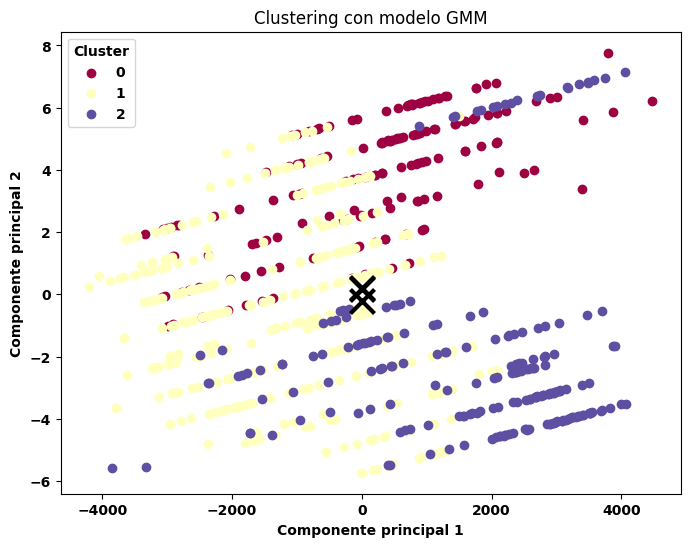

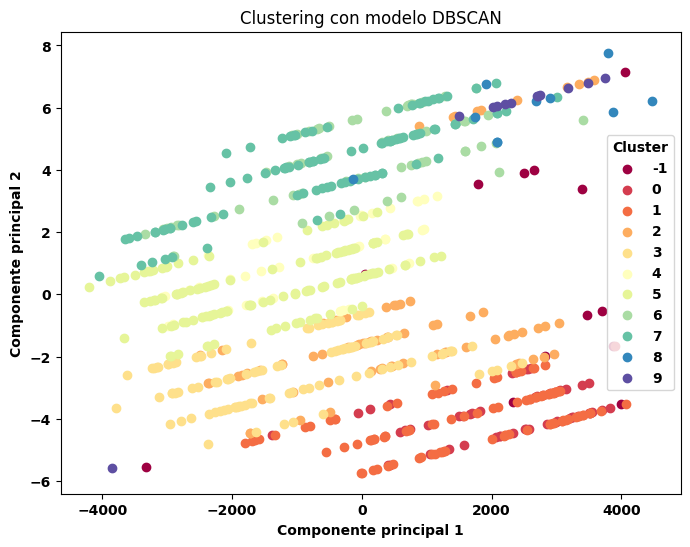

In [55]:
# Gráfica de clustering GMM
plot_clusters(X_pca, labels_gmm, centroids_gmm)
plt.title('Clustering con modelo GMM')

# Gráfica de clustering DBSCAN
plot_clusters(X_pca, labels_dbscan)
plt.title('Clustering con modelo DBSCAN')


Text(0.5, 1.0, 'Clustering con modelo DBSCAN')

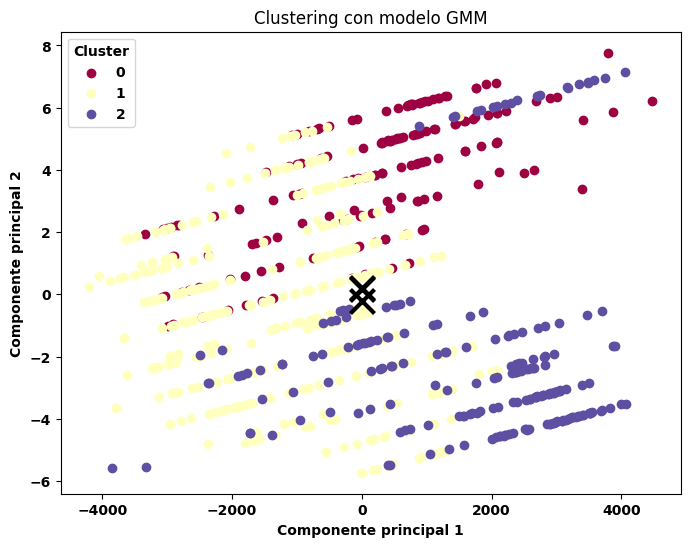

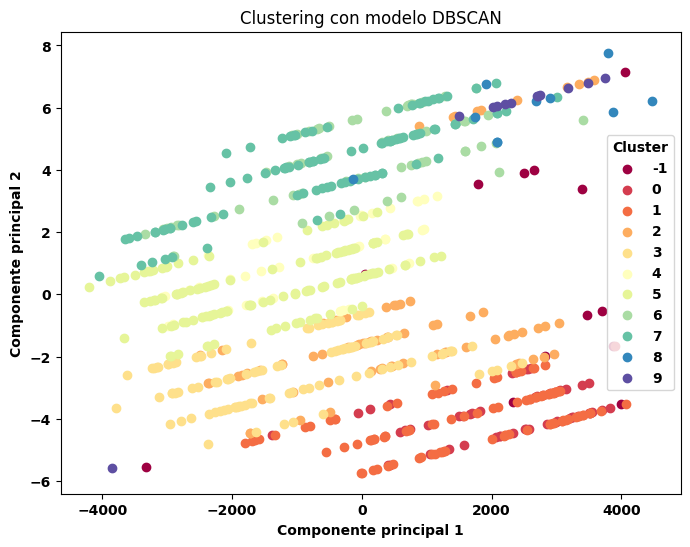

In [56]:
# Gráfica de clustering GMM
plot_clusters(X_pca, labels_gmm, centroids_gmm)
plt.title('Clustering con modelo GMM')

# Gráfica de clustering DBSCAN
plot_clusters(X_pca, labels_dbscan)
plt.title('Clustering con modelo DBSCAN')

In [57]:
# Cargar bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#Agglomerative con dendograma (`method ='single', metric='euclidean'`)
# Realizar la proyección a los dos componentes principales

pca = PCA(n_components=2)
pca.fit(df_bike3)
projected_data = pca.transform(df_bike3)

# Realizar el clustering con el método aglomerativo y generar el dendograma
agglom = AgglomerativeClustering(n_clusters=4, linkage='single', affinity='euclidean')
agglom.fit(projected_data)
dendrogram = dendrogram(projected_data, method='single', metric='euclidean')


C:\Users\flore\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


TypeError: dendrogram() got an unexpected keyword argument 'method'